# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [156]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [157]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [159]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [160]:
# Check the first few entries
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [161]:
# Inspect the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (74610, 24)


In [162]:
# Inspect the different columns in the dataset
print(*df.columns, sep=' | ')

df.info()

Employee ID | Age | Gender | Years at Company | Job Role | Monthly Income | Work-Life Balance | Job Satisfaction | Performance Rating | Number of Promotions | Overtime | Distance from Home | Education Level | Marital Status | Number of Dependents | Job Level | Company Size | Company Tenure (In Months) | Remote Work | Leadership Opportunities | Innovation Opportunities | Company Reputation | Employee Recognition | Attrition
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Wor

### **1.2 Check the basic statistics**

In [164]:
# Check the summary of the dataset
print("=== Dataset Info ===")
print(df.info())

print("\n=== Statistical Summary ===")
print(df.describe(include='all'))

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital St

### **1.3 Check the data type of columns**

In [166]:
# Check the info to see the types of the feature variables and the null values present
print("=== Dataset Info ===")
print(df.info())

print("\n=== Null Values in Each Column ===")
print(df.isnull().sum())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital St

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [170]:
# Check the number of missing values in each column
missing = df.isnull().sum()
print(missing[missing > 0])

Distance from Home            1912
Company Tenure (In Months)    2413
dtype: int64


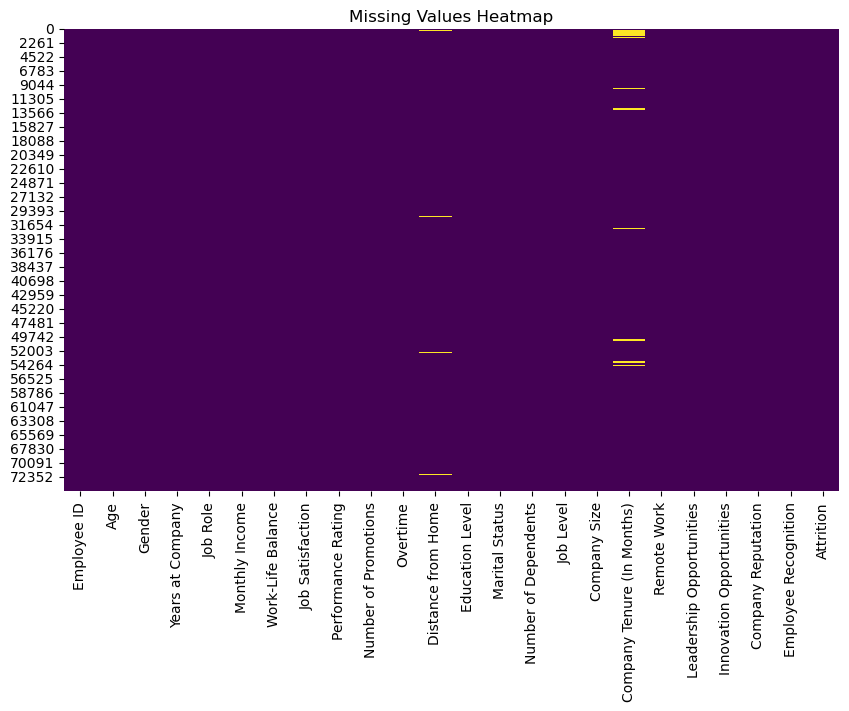

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [173]:
# Check the percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64


In [174]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
print(missing_percent)

Distance from Home            2.562659
Company Tenure (In Months)    3.234151
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [176]:
df.shape

(74610, 24)

In [177]:
# Handle the missing value rows in the column
df['Distance from Home'] = df['Distance from Home'].fillna(df['Distance from Home'].median())
df['Company Tenure (In Months)'] = df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median())

In [178]:
print(df.isnull().sum())

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [180]:
# Check the percentage of remaining data after missing values are removed
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [183]:
df.select_dtypes(include=['object']).nunique()

Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

In [184]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_redundant_categorical_values(df):
    print("=== Cleaned Unique Values in Categorical Columns ===")
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        unique_vals = df[col].astype(str).str.strip().str.lower().unique()
        print(f"\nColumn: {col}")
        print(unique_vals)

check_redundant_categorical_values(df)

=== Cleaned Unique Values in Categorical Columns ===

Column: Gender
['male' 'female']

Column: Job Role
['education' 'media' 'healthcare' 'technology' 'finance']

Column: Work-Life Balance
['excellent' 'poor' 'good' 'fair']

Column: Job Satisfaction
['medium' 'high' 'very high' 'low']

Column: Performance Rating
['average' 'low' 'high' 'below average']

Column: Overtime
['no' 'yes']

Column: Education Level
['associate degree' 'masterâ€™s degree' 'bachelorâ€™s degree'
 'high school' 'phd']

Column: Marital Status
['married' 'divorced' 'single']

Column: Job Level
['mid' 'senior' 'entry']

Column: Company Size
['medium' 'small' 'large']

Column: Remote Work
['no' 'yes']

Column: Leadership Opportunities
['no' 'yes']

Column: Innovation Opportunities
['no' 'yes']

Column: Company Reputation
['excellent' 'fair' 'poor' 'good']

Column: Employee Recognition
['medium' 'low' 'high' 'very high']

Column: Attrition
['stayed' 'left']


In [185]:
df['Education Level'] = df['Education Level'].str.replace('â€™', "'", regex=False)

In [186]:
print(df['Education Level'].unique())

['Associate Degree' "Master's Degree" "Bachelor's Degree" 'High School'
 'PhD']


In [187]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].str.replace('â€™', "'", regex=False)

In [188]:
# Check the data
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    male                19   education            5390   
1        64756   59  female                 4       media            5534   
2        30257   24  female                10  healthcare            8159   
3        65791   36  female                 7   education            3989   
4        65026   56    male                41   education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         excellent           medium            average                     2   
1              poor             high                low                     3   
2              good             high                low                     0   
3              good             high               high                     1   
4              fair        very high            average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        mid       medium   
1  ...                    3        mid       medium   
2  ...                    3        mid       medium   
3  ...                    2        mid        small   
4  ...                    0     senior       medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           no                       no   
1                       21.0           no                       no   
2                       74.0           no                       no   
3                       50.0          yes                       no   
4                       68.0           no                       no   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       no           excellent               medium    stayed  
1                       no                fair                  low    stayed  
2                       no                poor                  low    stayed  
3                       no                good               medium    stayed  
4                       no                fair               medium    stayed  

[5 rows x 24 columns]

In [189]:
df["Attrition"].value_counts()
df["Attrition"].value_counts("percent")

Attrition
stayed    0.525278
left      0.474722
Name: proportion, dtype: float64

In [190]:
df.shape

(74610, 24)

In [191]:
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        74610.000000          74610.000000   
mean               0.832958           49.991074              1.657432   
std                0.995326           28.151335              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           26.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           74.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                74610.000000  
mean                    55.721217  
std                     24.978384  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     75.000000  
max                    128.000000

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [193]:
# Drop redundant columns which are not required for modelling
df.drop(["Company Tenure (In Months)", "Employee ID"], inplace = True, axis = 1)

In [194]:
# Check first few rows of data
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    male                19   education            5390   
1   59  female                 4       media            5534   
2   24  female                10  healthcare            8159   
3   36  female                 7   education            3989   
4   56    male                41   education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         excellent           medium            average                     2   
1              poor             high                low                     3   
2              good             high                low                     0   
3              good             high               high                     1   
4              fair        very high            average                     0   

  Overtime  ...  Marital Status Number of Dependents Job Level  Company Size  \
0       no  ...         married                    0       mid        medium   
1       no  ...        divorced                    3       mid        medium   
2       no  ...         married                    3       mid        medium   
3       no  ...          single                    2       mid         small   
4      yes  ...        divorced                    0    senior        medium   

  Remote Work Leadership Opportunities Innovation Opportunities  \
0          no                       no                       no   
1          no                       no                       no   
2          no                       no                       no   
3         yes                       no                       no   
4          no                       no                       no   

  Company Reputation Employee Recognition Attrition  
0          excellent               medium    stayed  
1               fair                  low    stayed  
2               poor                  low    stayed  
3               good               medium    stayed  
4               fair               medium    stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [197]:
# Import Train Test Split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [199]:
# Put all the feature variables in X
X = df.drop("Attrition", axis = 1)
# Put the target variable in y
y = df["Attrition"]

In [200]:
X.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    male                19   education            5390   
1   59  female                 4       media            5534   
2   24  female                10  healthcare            8159   
3   36  female                 7   education            3989   
4   56    male                41   education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         excellent           medium            average                     2   
1              poor             high                low                     3   
2              good             high                low                     0   
3              good             high               high                     1   
4              fair        very high            average                     0   

  Overtime  ...    Education Level Marital Status Number of Dependents  \
0       no  ...   associate degree        married                    0   
1       no  ...    master's degree       divorced                    3   
2       no  ...  bachelor's degree        married                    3   
3       no  ...        high school         single                    2   
4      yes  ...        high school       divorced                    0   

   Job Level Company Size Remote Work Leadership Opportunities  \
0        mid       medium          no                       no   
1        mid       medium          no                       no   
2        mid       medium          no                       no   
3        mid        small         yes                       no   
4     senior       medium          no                       no   

  Innovation Opportunities Company Reputation Employee Recognition  
0                       no          excellent               medium  
1                       no               fair                  low  
2                       no               poor                  low  
3                       no               good               medium  
4                       no               fair               medium  

[5 rows x 21 columns]

In [201]:
y.head()

0    stayed
1    stayed
2    stayed
3    stayed
4    stayed
Name: Attrition, dtype: object

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [203]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [204]:
print("Training feature set shape:", X_train.shape)
print("Validation feature set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_test.shape)

Training feature set shape: (52227, 21)
Validation feature set shape: (22383, 21)
Training target shape: (52227,)
Validation target shape: (22383,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [209]:
# Select numerical columns
varlist = X_train.describe().columns
varlist

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

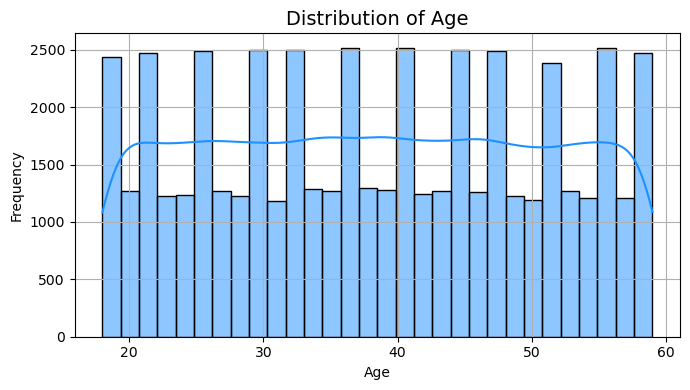

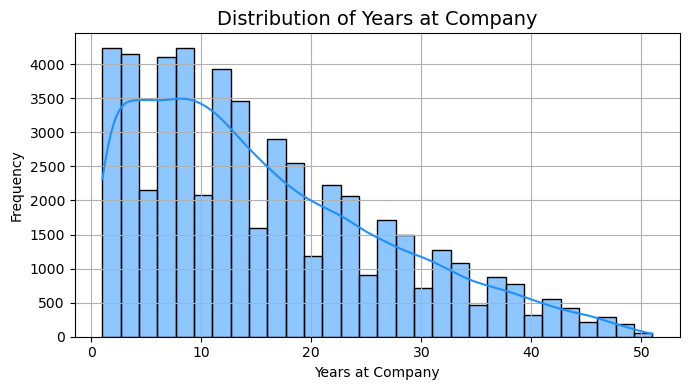

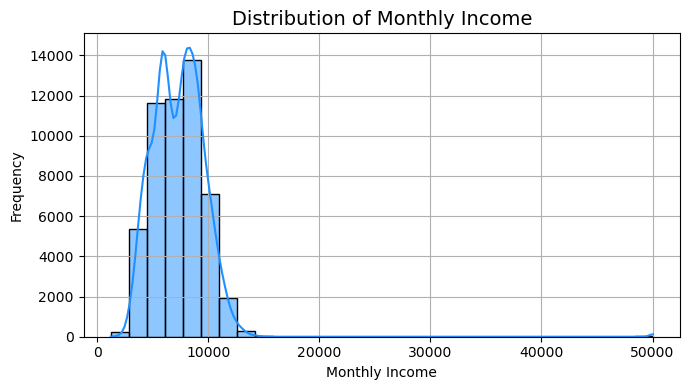

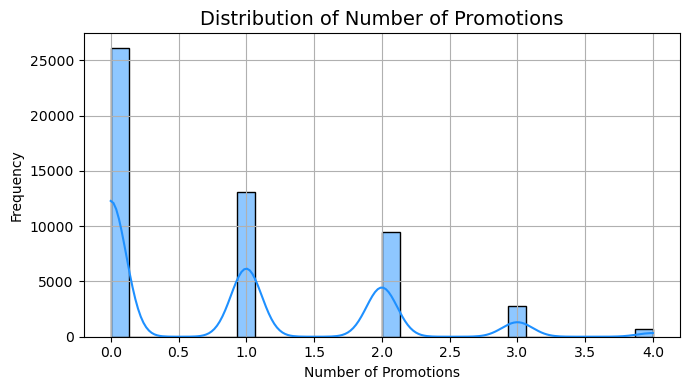

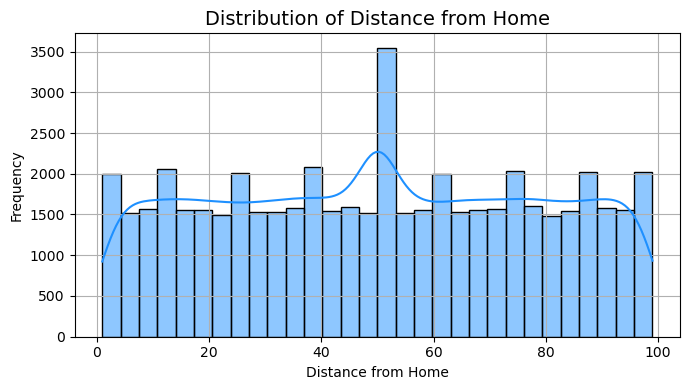

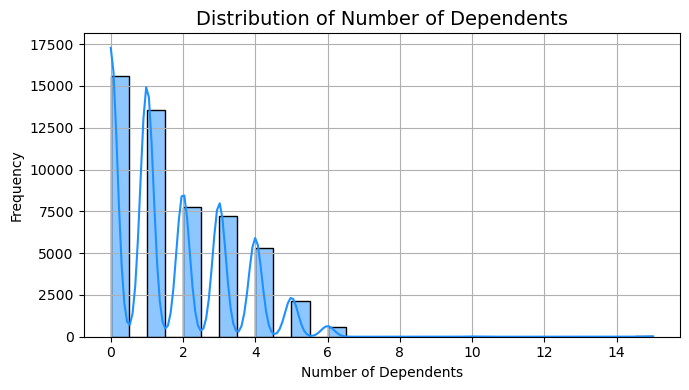

In [211]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for col in varlist:
    plt.figure(figsize=(7, 4))
    sns.histplot(X_train[col], kde=True, bins=30, color='dodgerblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

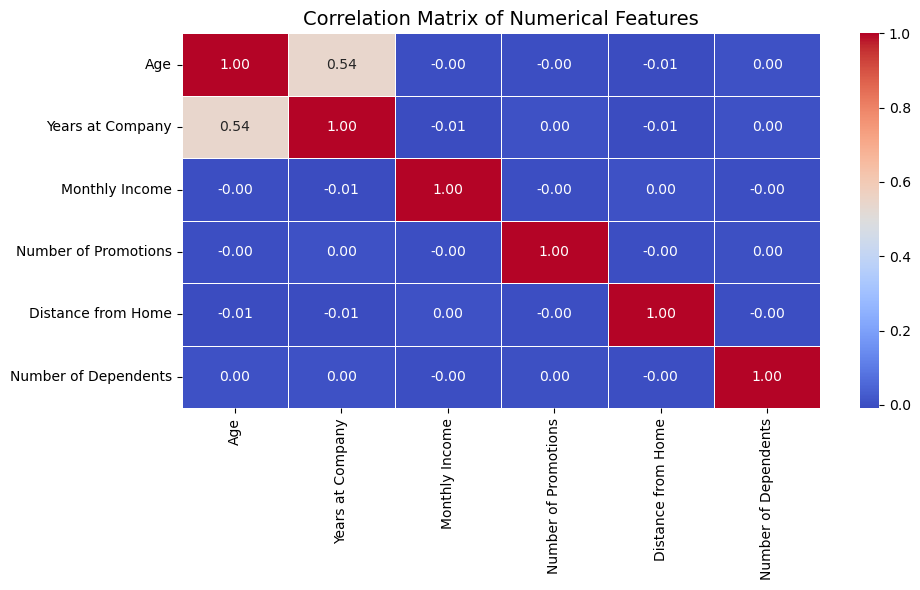

In [214]:
# Create correlation matrix for numerical columns
corr_matrix = X_train[varlist].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [215]:
sns.pairplot(X_train)

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

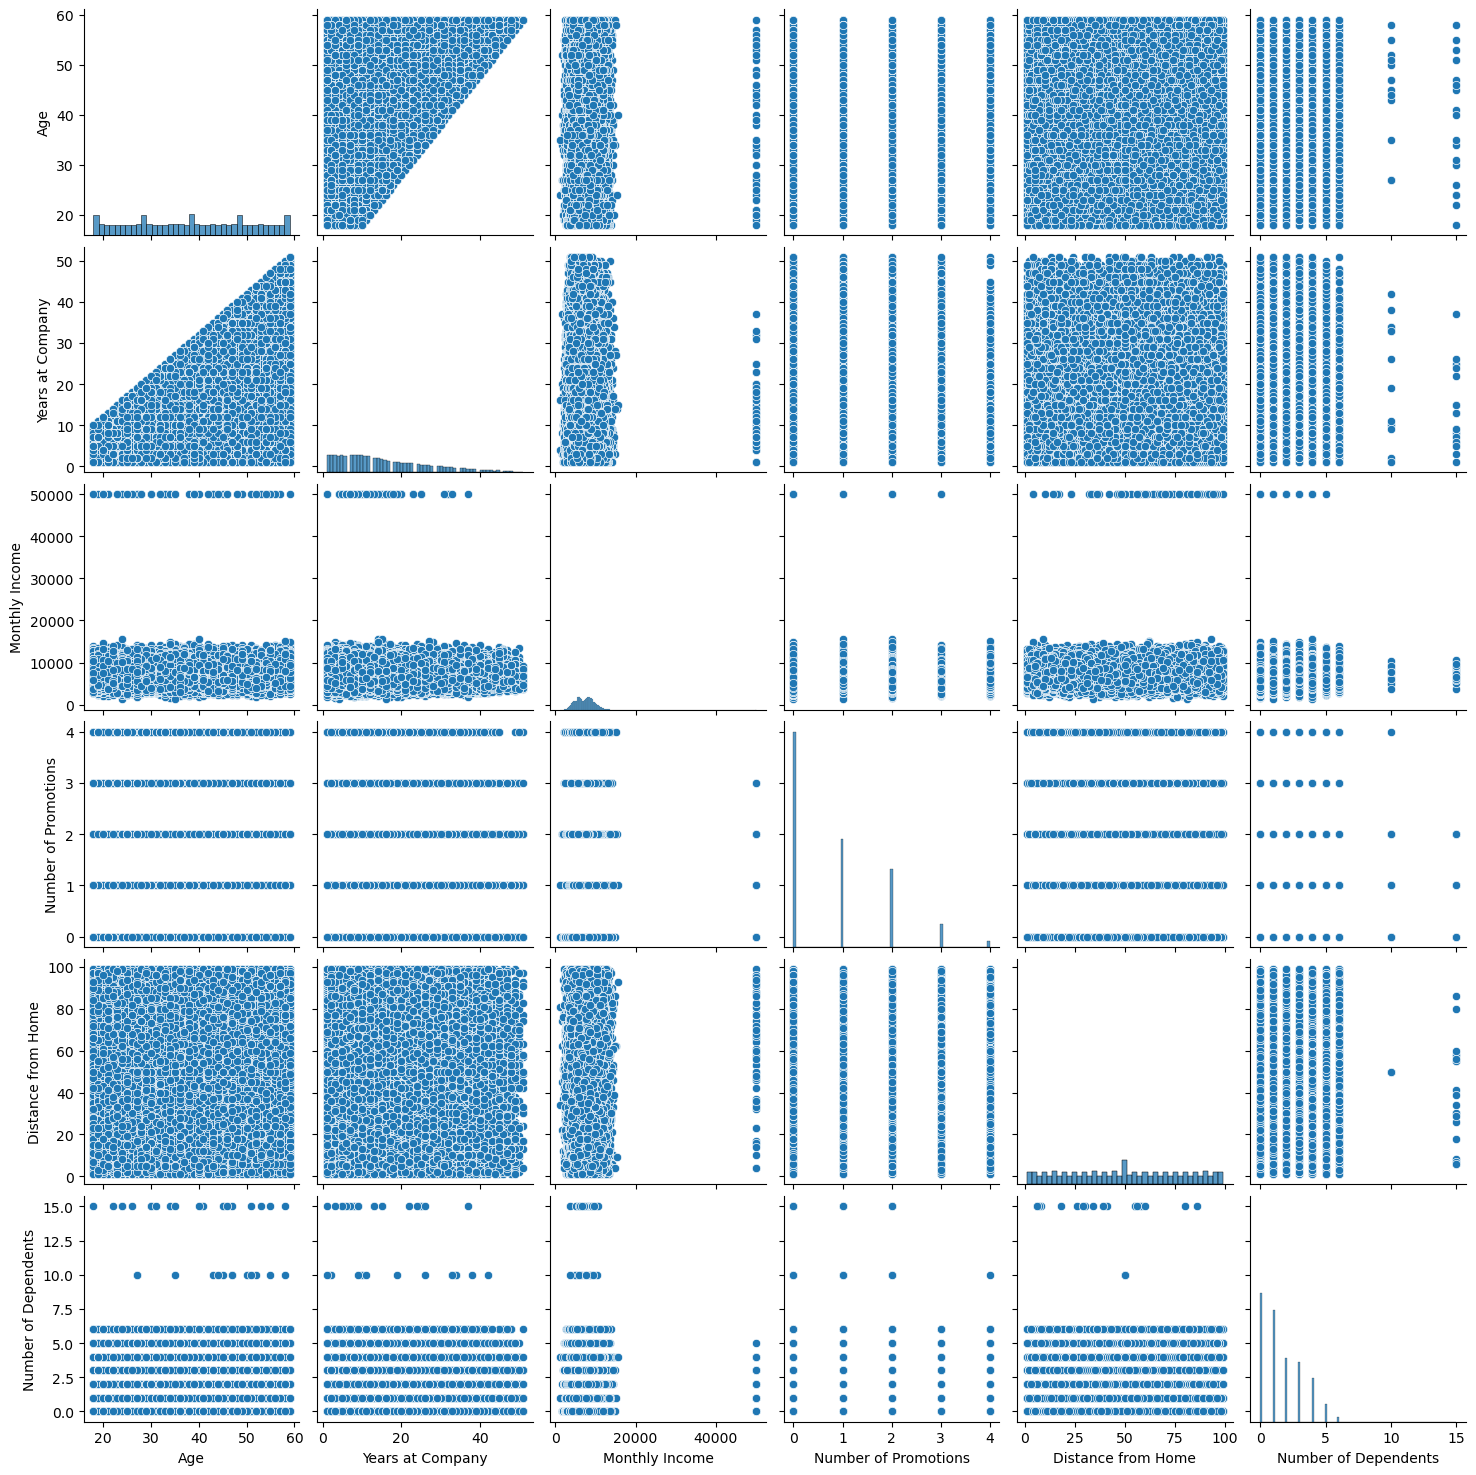

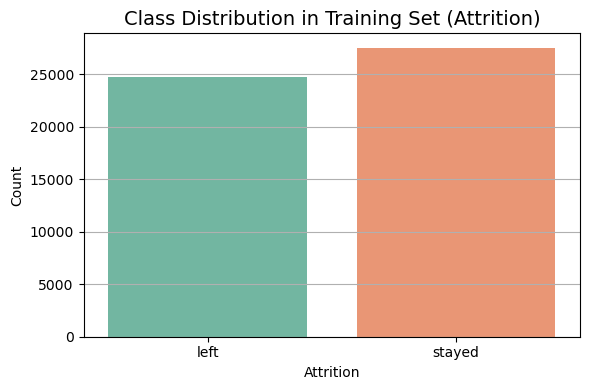

Class Distribution:
 Attrition
stayed    52.645184
left      47.354816
Name: proportion, dtype: float64


In [218]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution in Training Set (Attrition)', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Class Distribution:\n", y_train.value_counts(normalize=True) * 100)

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [221]:
y_train.value_counts()

Attrition
stayed    27495
left      24732
Name: count, dtype: int64

In [222]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

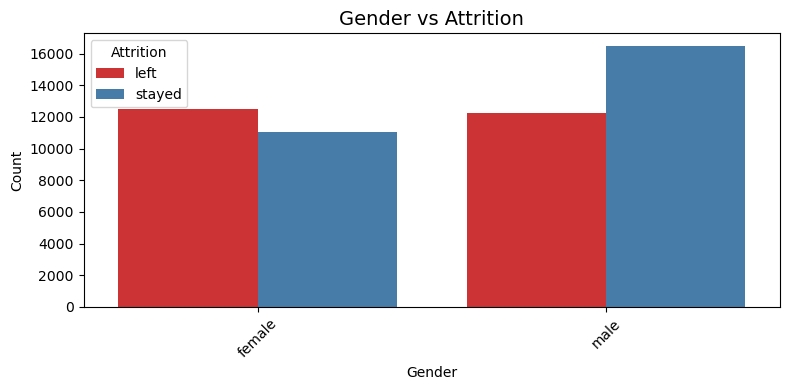

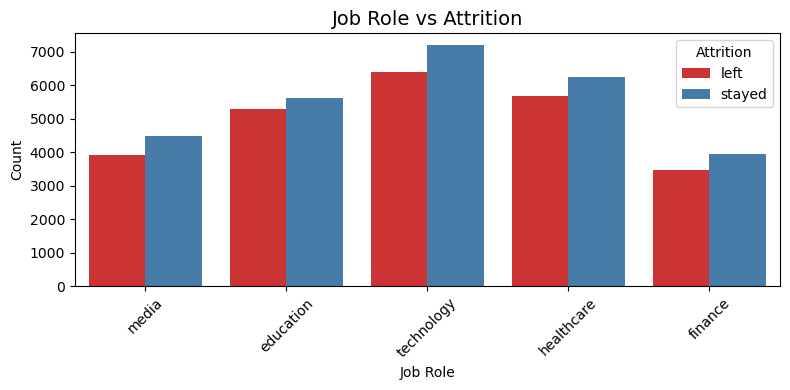

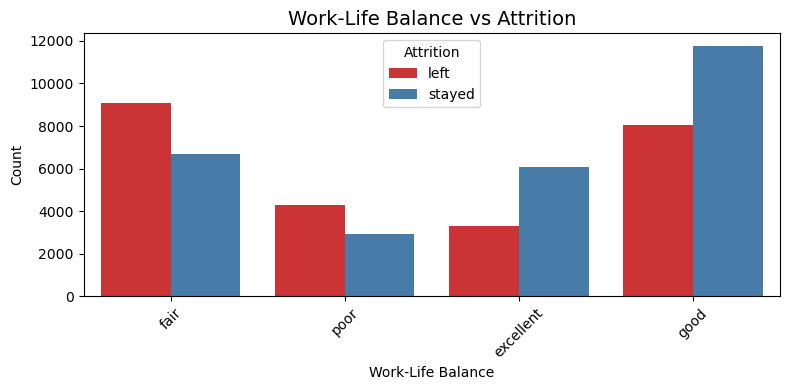

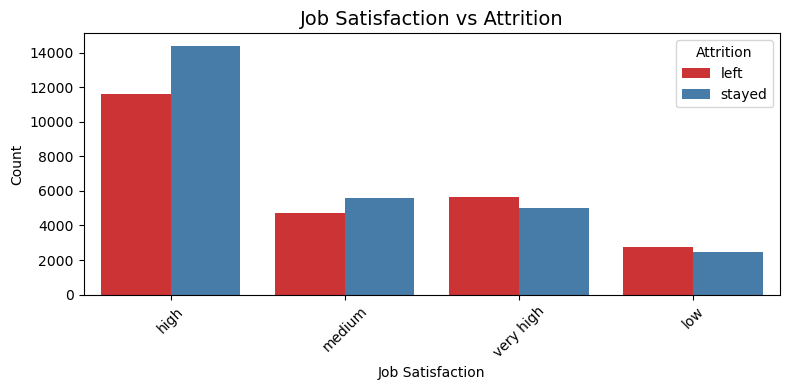

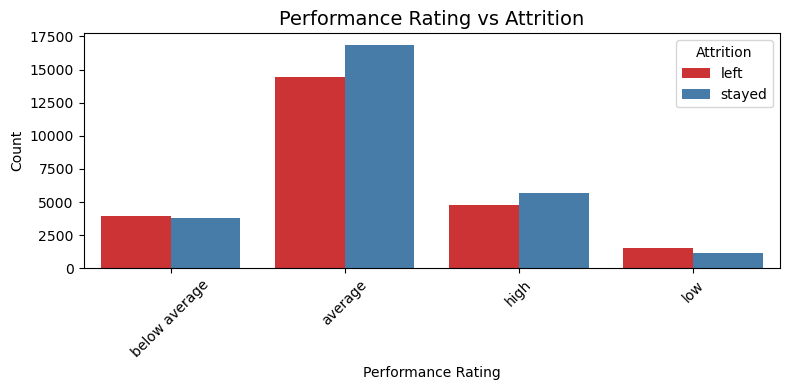

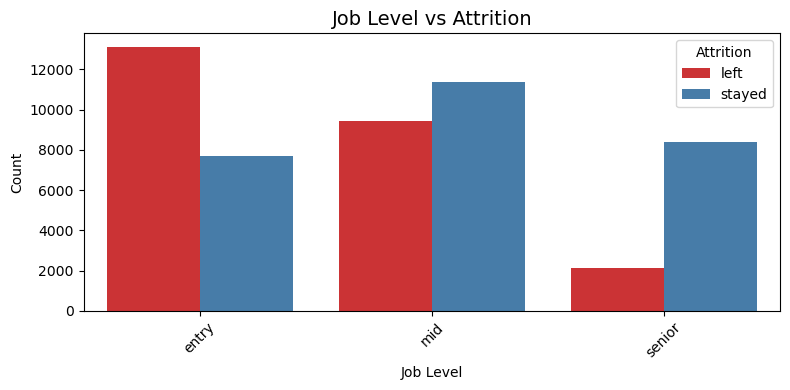

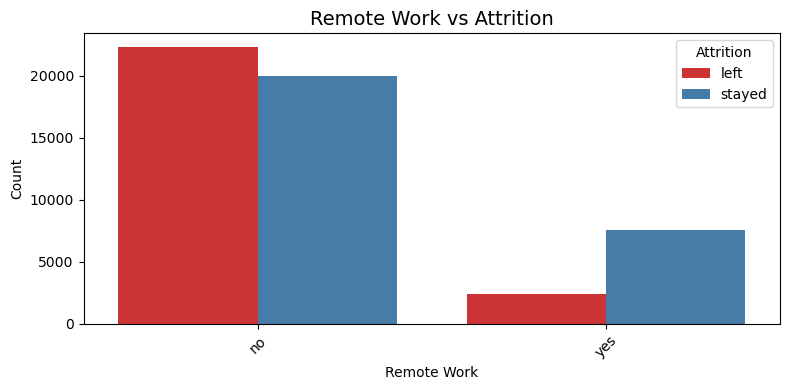

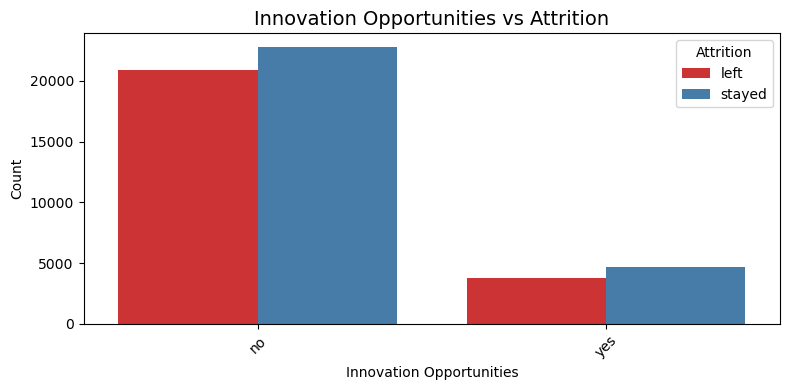

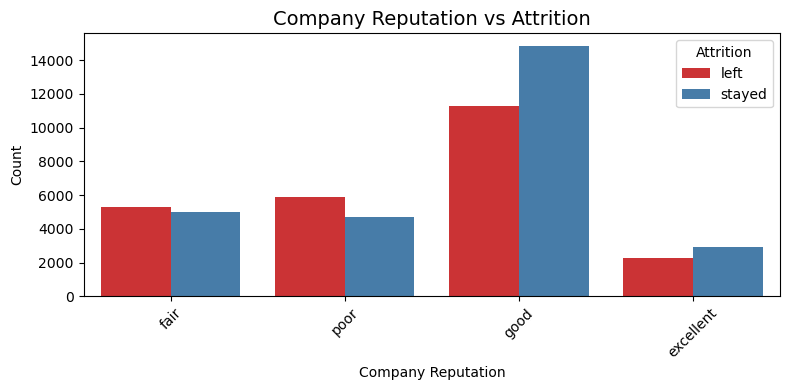

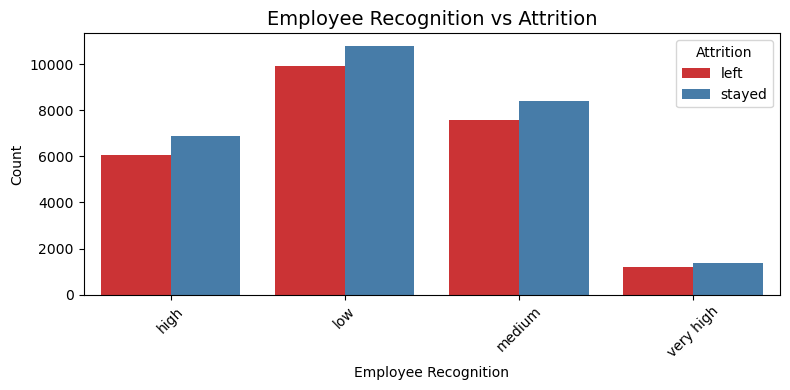

In [223]:
# Plot distribution for each categorical column with target variable
categorical_cols = X_train.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue=y_train, data=X_train, palette='Set1')
    plt.title(f'{col} vs Attrition', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [228]:
# Select numerical columns
X_test.describe().columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

In [230]:
# Plot all the numerical columns to understand their distribution
sns.pairplot(X_test)

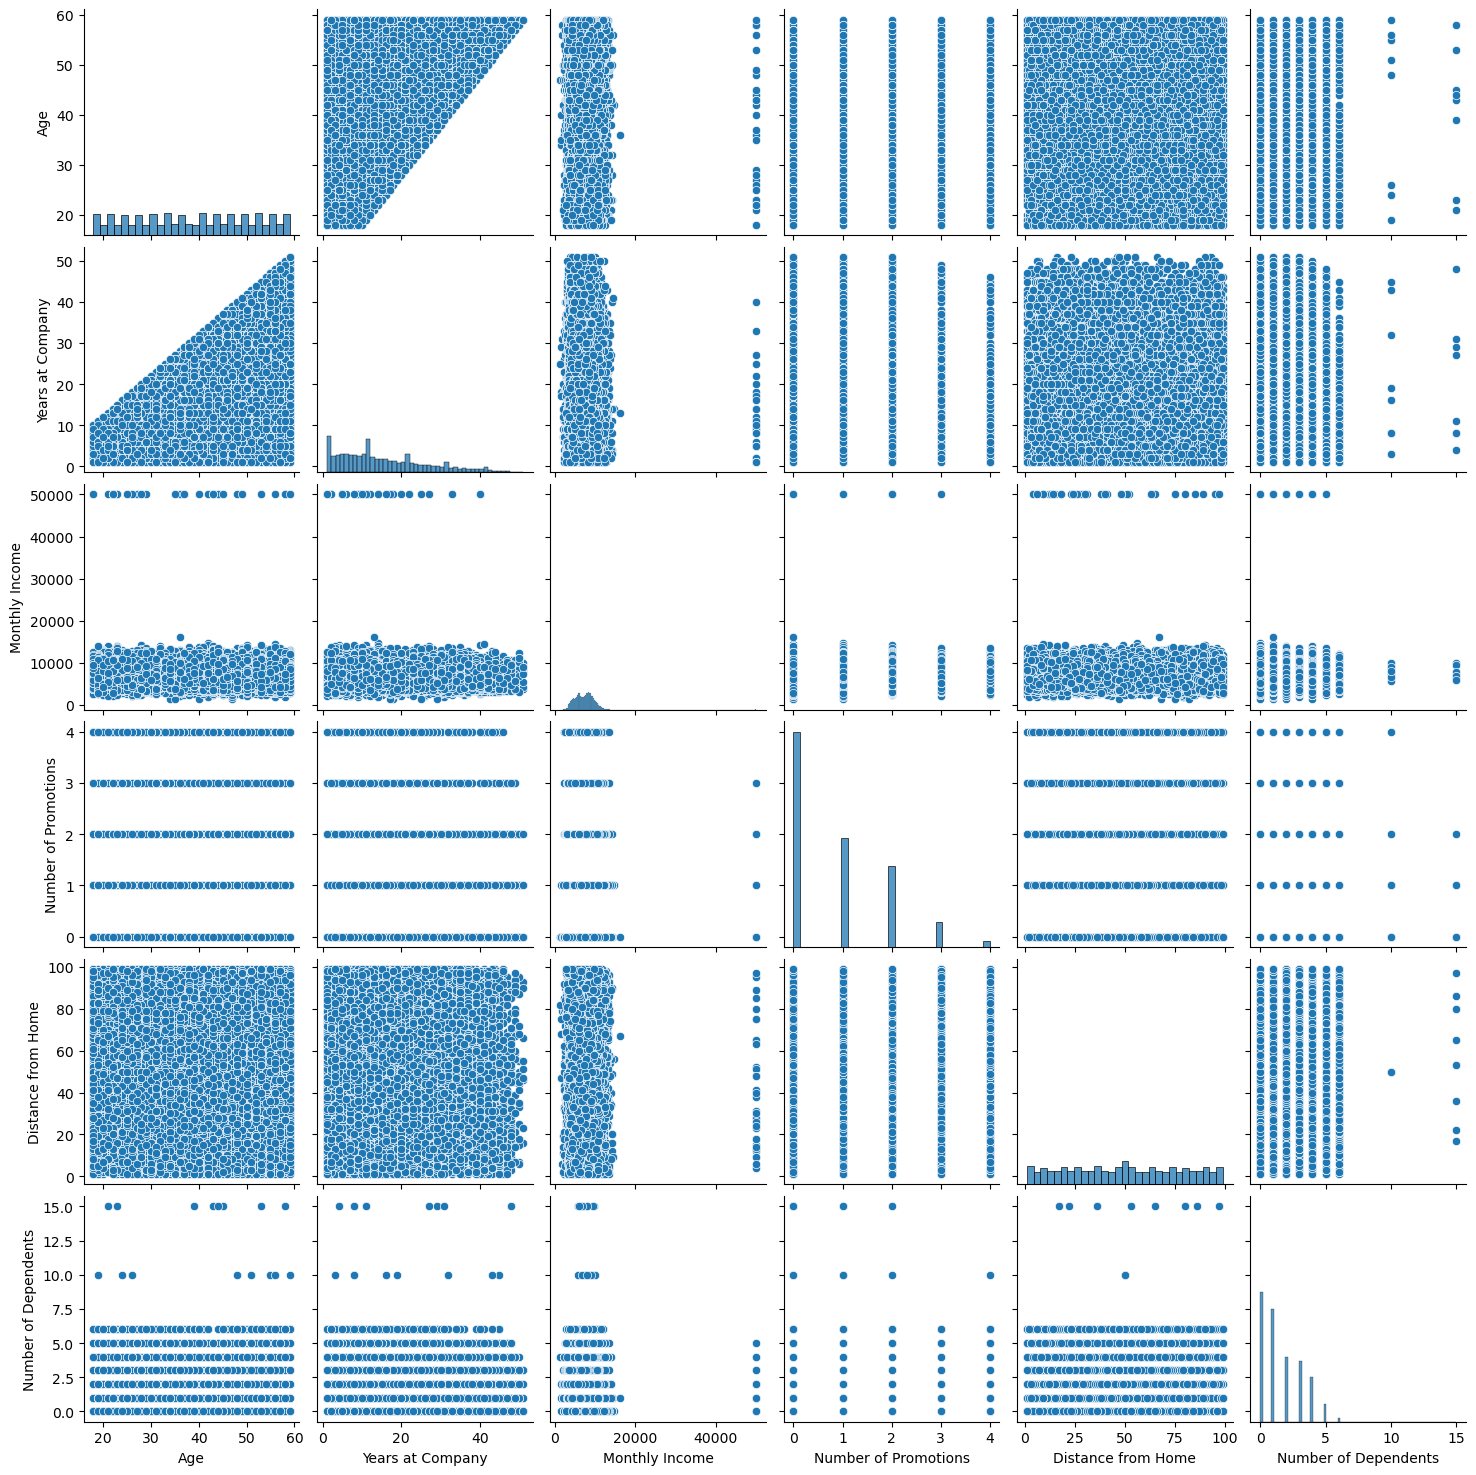

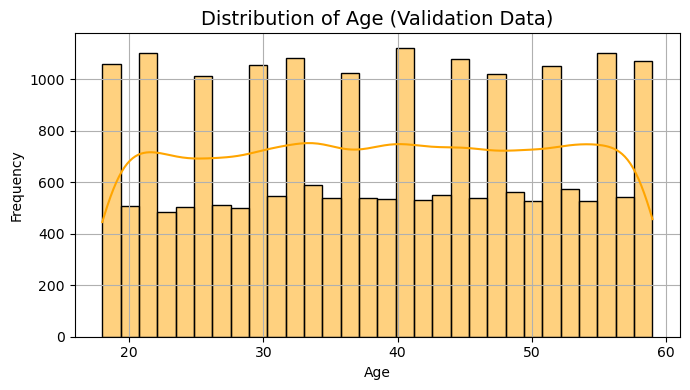

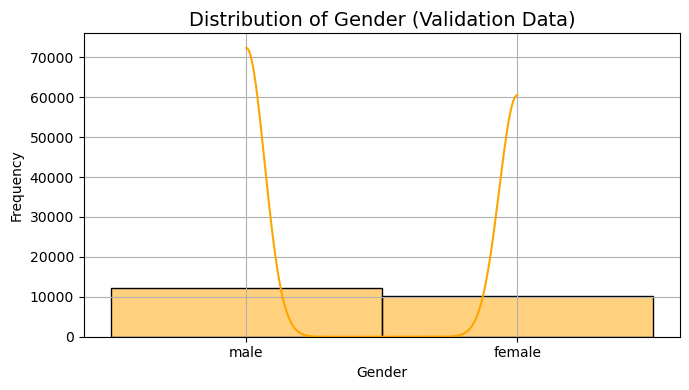

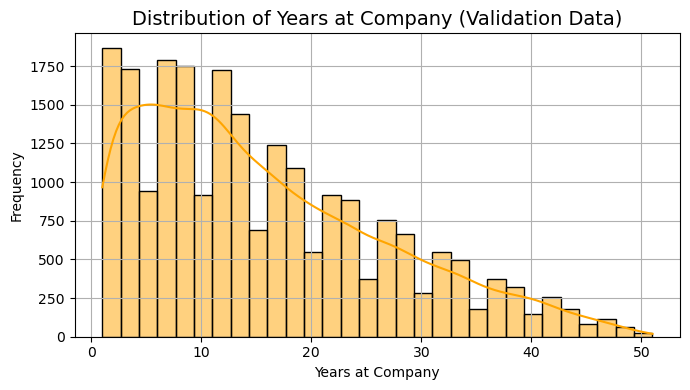

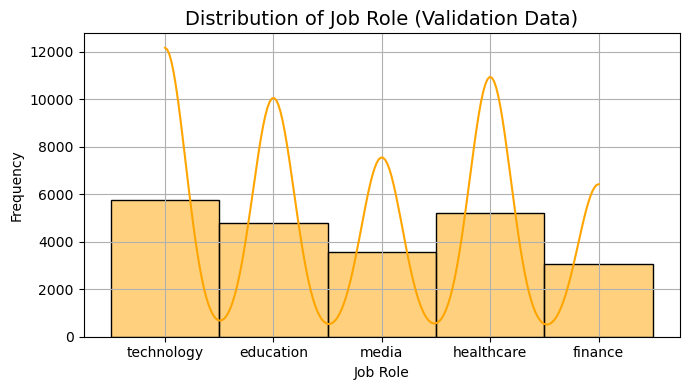

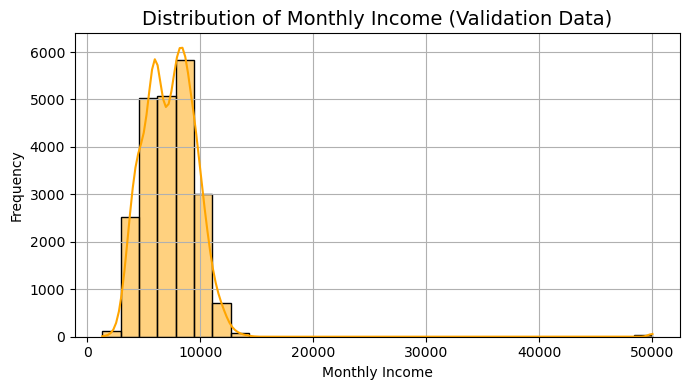

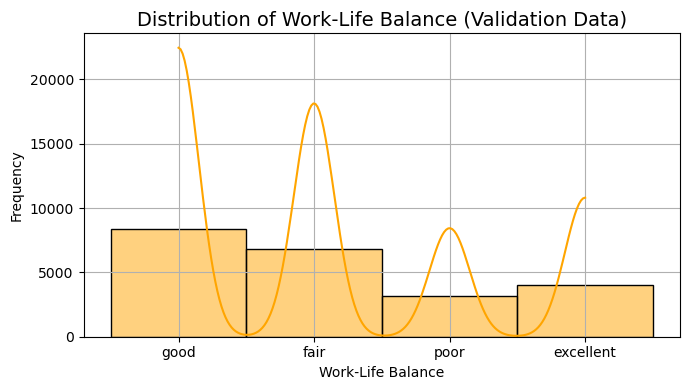

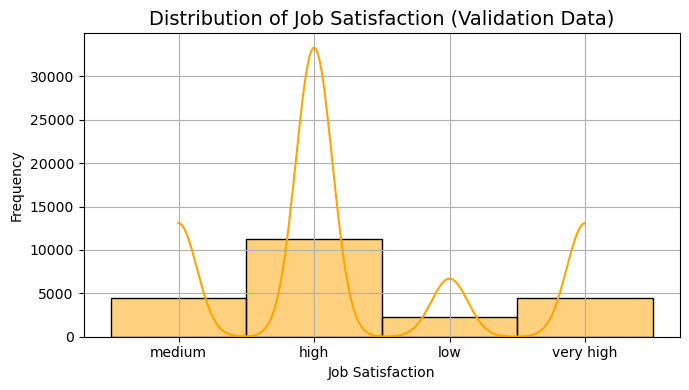

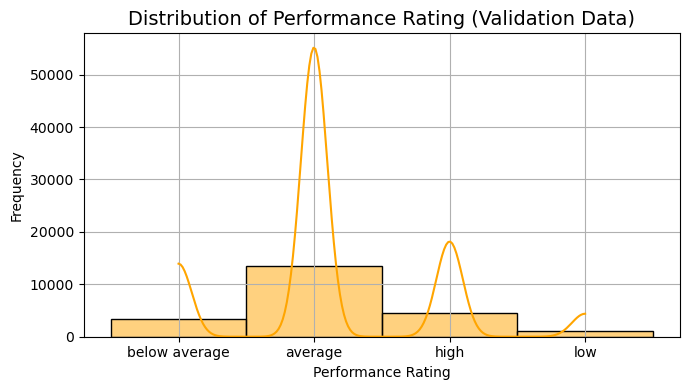

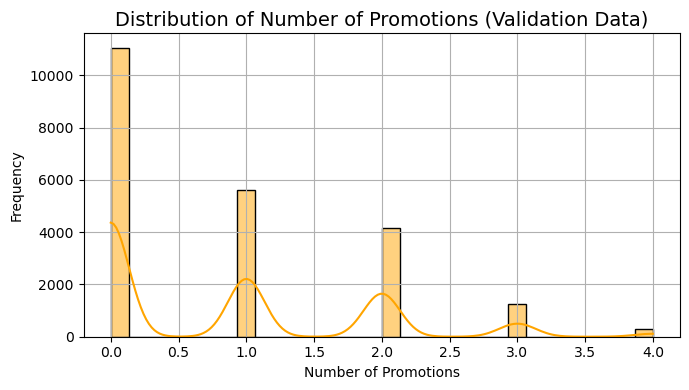

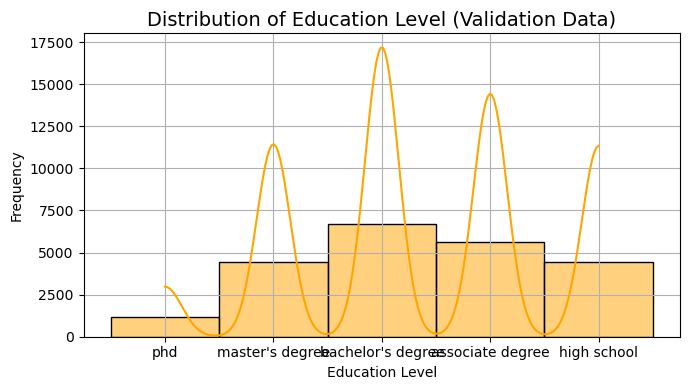

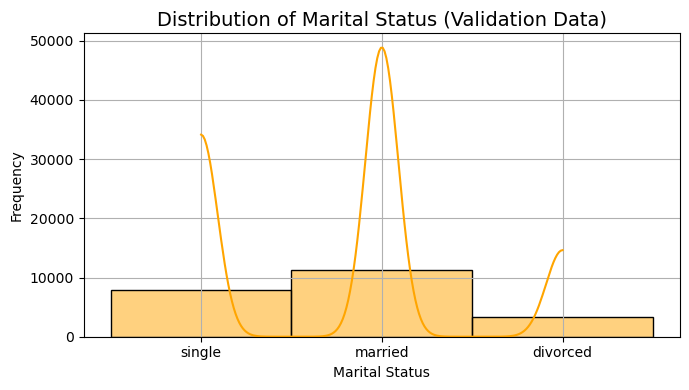

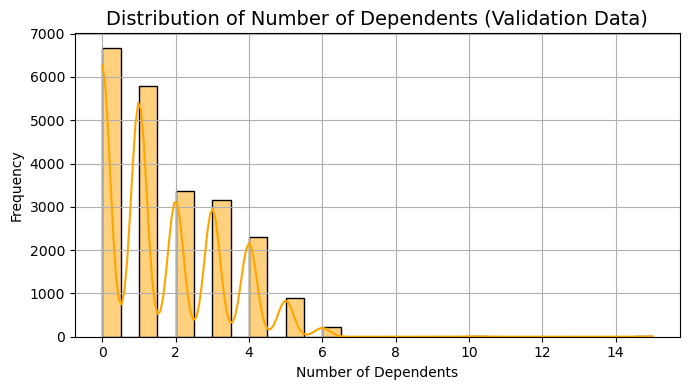

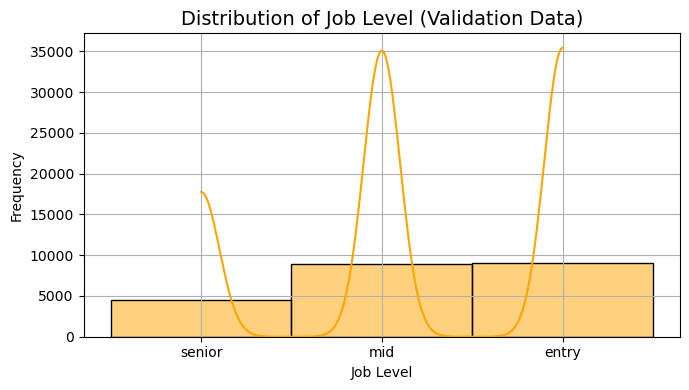

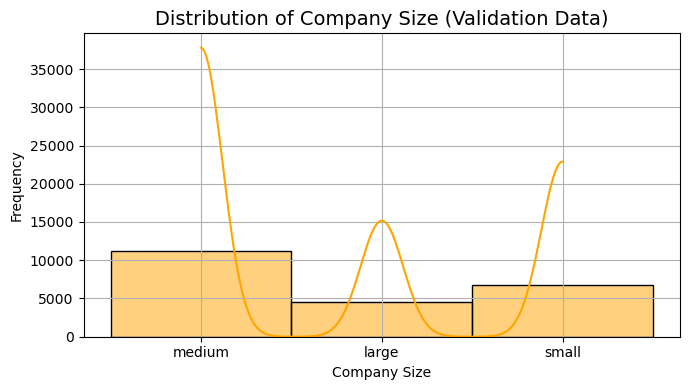

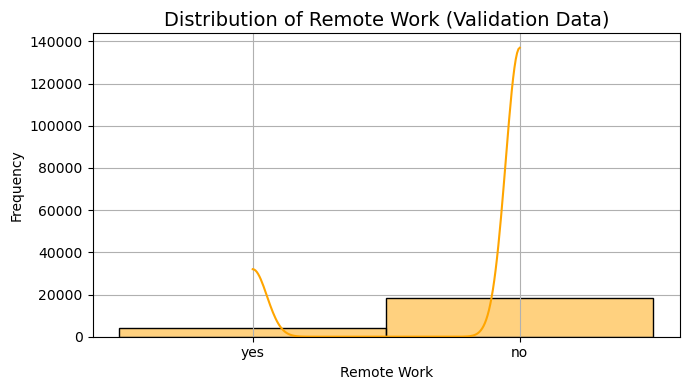

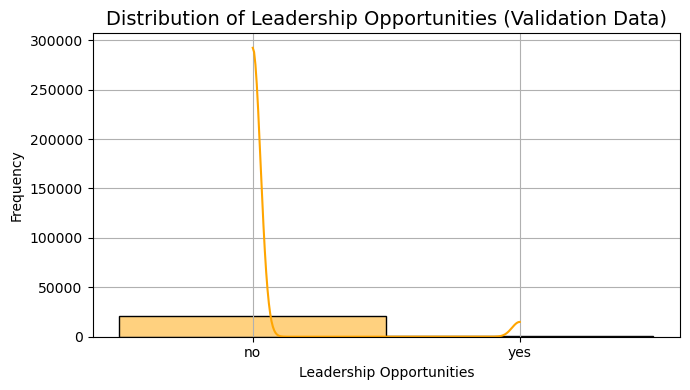

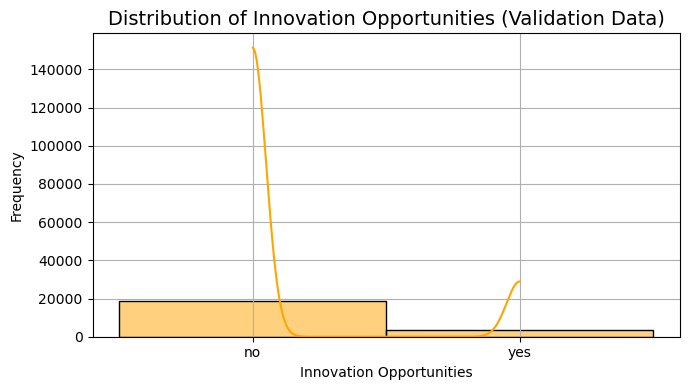

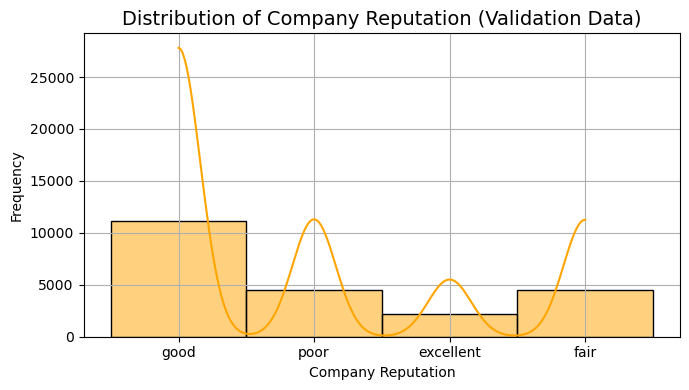

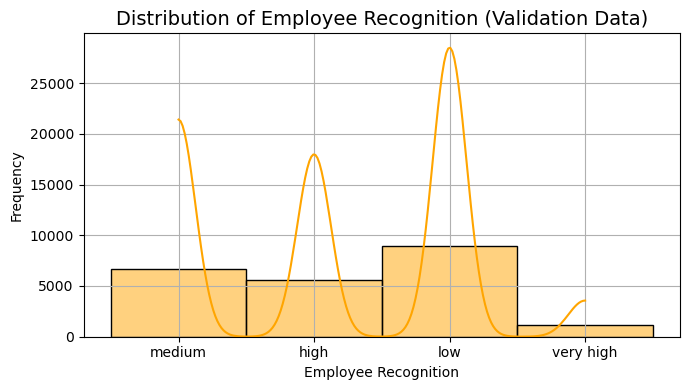

In [231]:
# Plot all the numerical columns to understand their distribution
import seaborn as sns
import matplotlib.pyplot as plt

for col in X_test:
    plt.figure(figsize=(7, 4))
    sns.histplot(X_test[col], kde=True, bins=30, color='orange')
    plt.title(f'Distribution of {col} (Validation Data)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

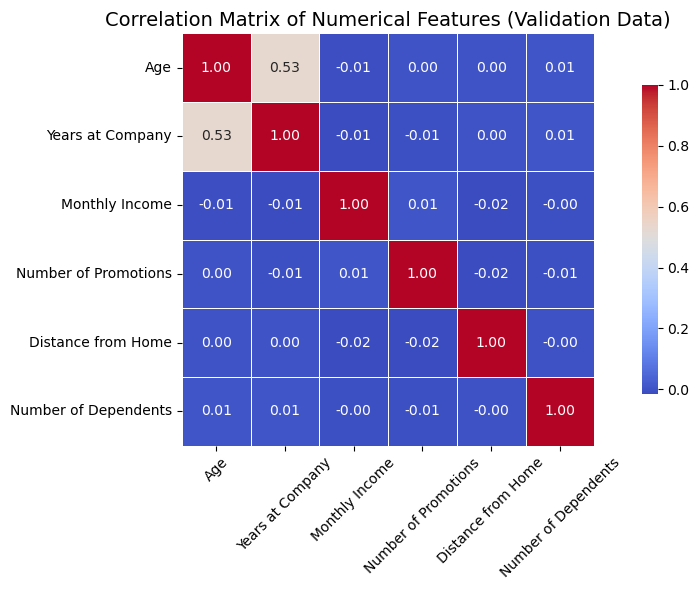

In [234]:
X_test_numeric = X_test.select_dtypes(include='number')

# Create correlation matrix for numerical columns
val_corr_matrix = X_test_numeric.corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(val_corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": .75})

plt.title('Correlation Matrix of Numerical Features (Validation Data)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

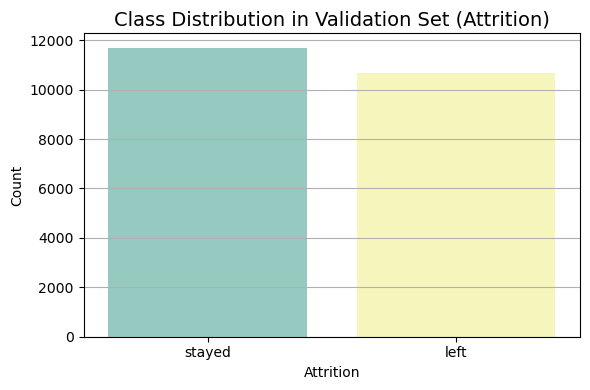

Class Distribution (%):
 Attrition
stayed    52.253943
left      47.746057
Name: proportion, dtype: float64


In [237]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='Set3')
plt.title('Class Distribution in Validation Set (Attrition)', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Class Distribution (%):\n", y_test.value_counts(normalize=True) * 100)

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

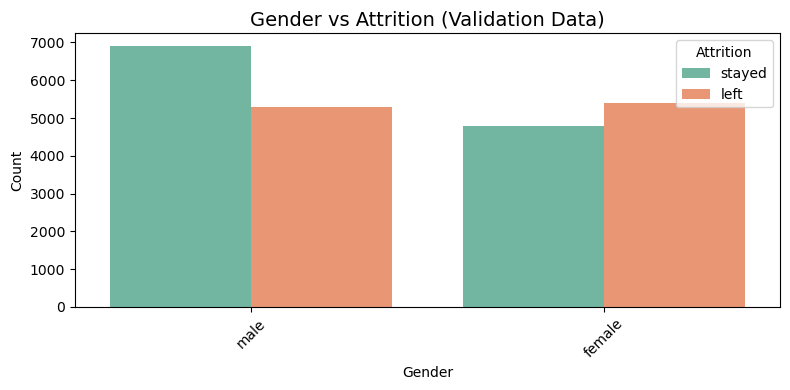

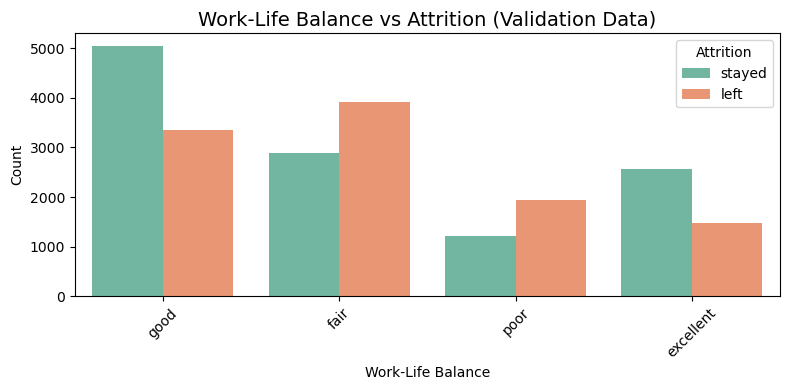

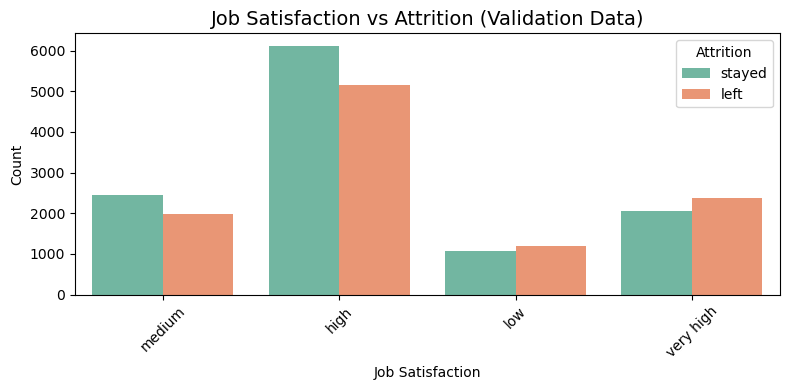

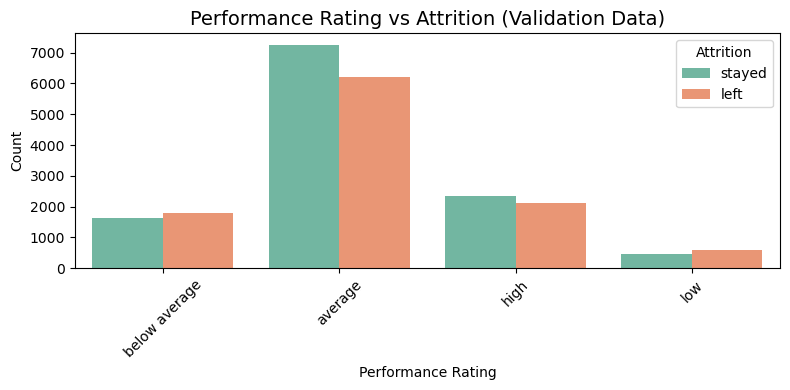

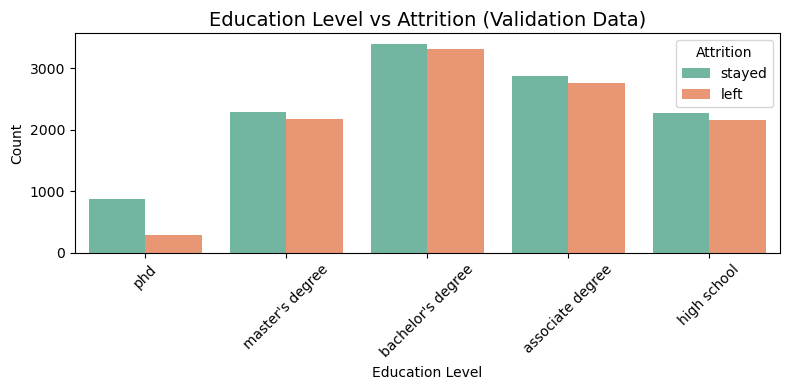

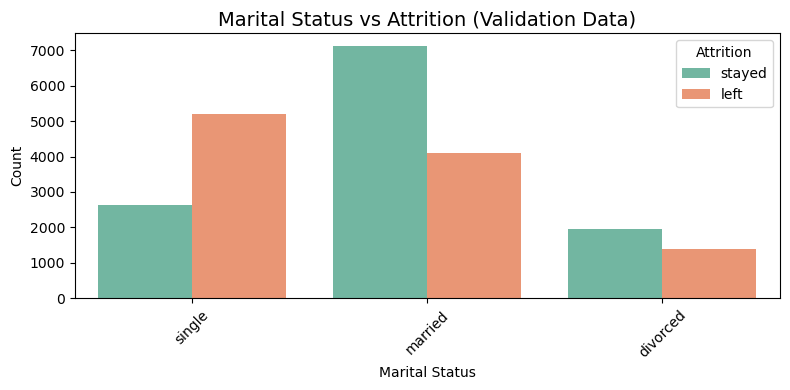

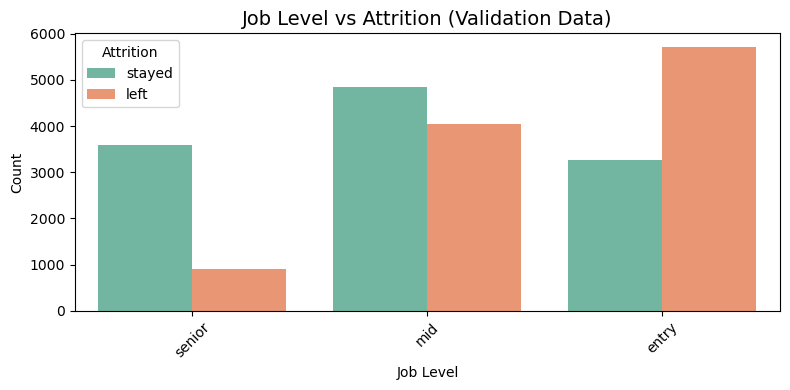

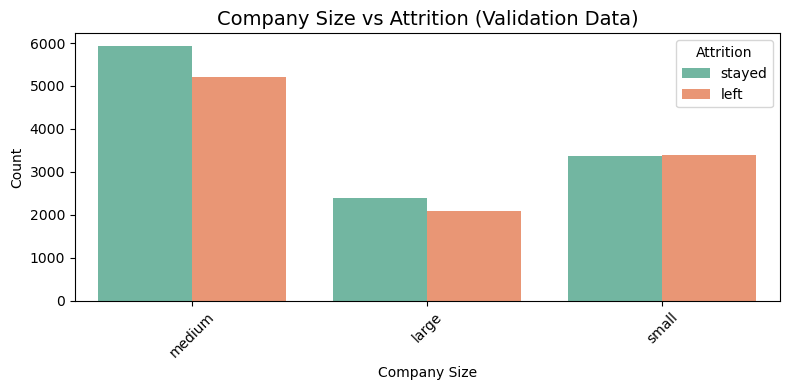

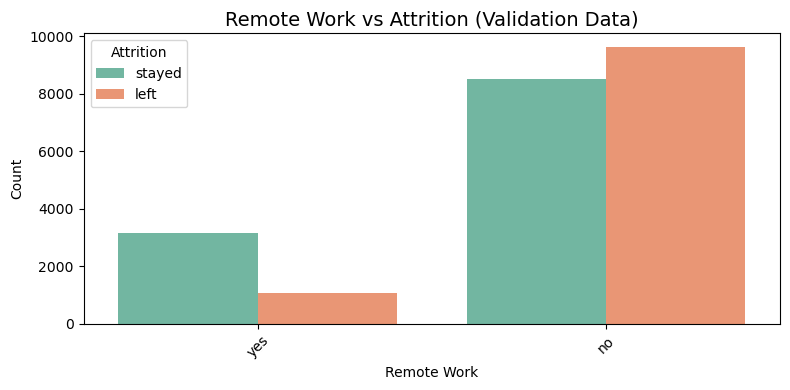

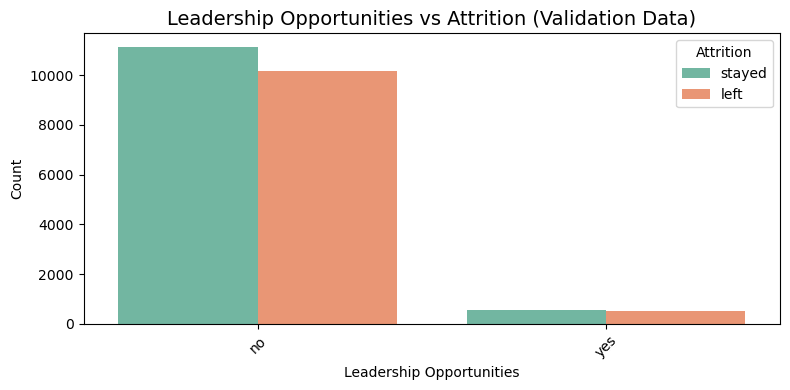

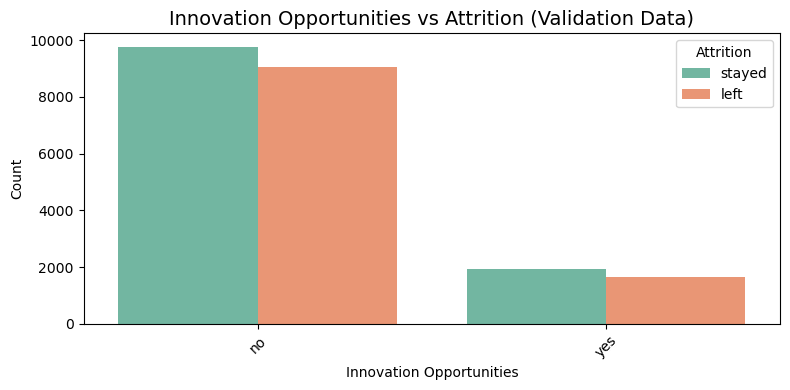

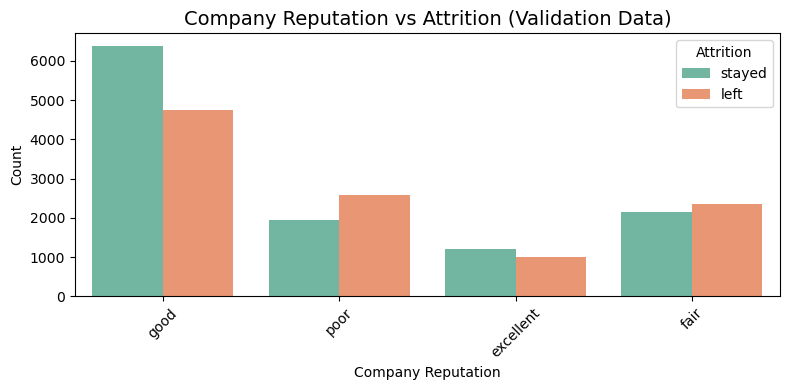

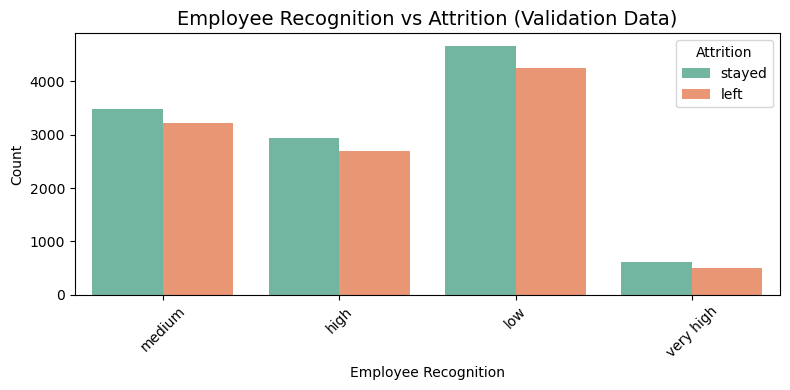

In [240]:
# Plot distribution for each categorical column with target variable
val_categorical_cols = X_test.select_dtypes(include='object').columns

for col in val_categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=X_test[col], hue=y_test, palette='Set2')
    plt.title(f'{col} vs Attrition (Validation Data)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [244]:
# Check the categorical columns
varlist = ["Gender", "Job Role", "Work-Life Balance","Job Satisfaction","Performance Rating", "Education Level", "Marital Status", "Company Size", "Company Reputation", "Employee Recognition", "Job Level", "Overtime","Remote Work","Leadership Opportunities", "Innovation Opportunities"]

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [246]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy1 = pd.get_dummies(X_train[varlist], drop_first = True, dtype=int)
# Add the results to the master DataFrame
X_train = pd.concat([X_train, dummy1], axis = 1)

In [247]:
X_train.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
60704   33  female                23       media            6379   
16163   52    male                 3   education            3776   
25709   36  female                20  technology           12194   
4354    46  female                 7  healthcare            7591   
49862   35    male                26   education            5028   

      Work-Life Balance Job Satisfaction Performance Rating  \
60704              fair             high      below average   
16163              poor           medium            average   
25709         excellent             high               high   
4354          excellent        very high            average   
49862              fair           medium               high   

       Number of Promotions Overtime  ...  Company Reputation_poor  \
60704                     0       no  ...                        0   
16163                     1      yes  ...                        1   
25709                     0      yes  ...                        0   
4354                      0       no  ...                        0   
49862                     1      yes  ...                        0   

      Employee Recognition_low Employee Recognition_medium  \
60704                        0                           0   
16163                        1                           0   
25709                        0                           1   
4354                         0                           0   
49862                        1                           0   

       Employee Recognition_very high Job Level_mid Job Level_senior  \
60704                               0             0                0   
16163                               0             1                0   
25709                               0             1                0   
4354                                0             0                0   
49862                               0             0                0   

      Overtime_yes Remote Work_yes Leadership Opportunities_yes  \
60704            0               0                            0   
16163            1               0                            0   
25709            1               0                            0   
4354             0               0                            0   
49862            1               0                            0   

      Innovation Opportunities_yes  
60704                            0  
16163                            0  
25709                            1  
4354                             0  
49862                            1  

[5 rows x 55 columns]

Now, drop the original categorical columns and check the DataFrame

In [249]:
# Drop the original categorical columns and check the DataFrame
X_train.drop(X_train[varlist], inplace=True, axis=1)

In [250]:
X_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
60704   33                23            6379                     0   
16163   52                 3            3776                     1   
25709   36                20           12194                     0   
4354    46                 7            7591                     0   
49862   35                26            5028                     1   

       Distance from Home  Number of Dependents  Gender_male  \
60704                40.0                     2            0   
16163                93.0                     2            1   
25709                21.0                     2            0   
4354                 96.0                     1            0   
49862                28.0                     0            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
60704                 0                    0               1  ...   
16163                 0                    0               0  ...   
25709                 0                    0               0  ...   
4354                  0                    1               0  ...   
49862                 0                    0               0  ...   

       Company Reputation_poor  Employee Recognition_low  \
60704                        0                         0   
16163                        1                         1   
25709                        0                         0   
4354                         0                         0   
49862                        0                         1   

       Employee Recognition_medium  Employee Recognition_very high  \
60704                            0                               0   
16163                            0                               0   
25709                            1                               0   
4354                             0                               0   
49862                            0                               0   

       Job Level_mid  Job Level_senior  Overtime_yes  Remote Work_yes  \
60704              0                 0             0                0   
16163              1                 0             1                0   
25709              1                 0             1                0   
4354               0                 0             0                0   
49862              0                 0             1                0   

       Leadership Opportunities_yes  Innovation Opportunities_yes  
60704                             0                             0  
16163                             0                             0  
25709                             0                             1  
4354                              0                             0  
49862                             0                             1  

[5 rows x 40 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [252]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy2 = pd.get_dummies(X_test[varlist], drop_first = True, dtype=int)
# Add the results to the master DataFrame
X_test = pd.concat([X_test, dummy2], axis = 1)

In [253]:
X_test.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
61539   58    male                43  technology           10970   
42583   18  female                 6  technology            9242   
55936   49    male                15   education            5171   
66035   46  female                18  technology            8151   
23119   43    male                22  technology            8304   

      Work-Life Balance Job Satisfaction Performance Rating  \
61539              good           medium      below average   
42583              good             high            average   
55936              good              low               high   
66035              fair        very high            average   
23119              fair             high            average   

       Number of Promotions Overtime  ...  Company Reputation_poor  \
61539                     0       no  ...                        0   
42583                     0      yes  ...                        0   
55936                     0       no  ...                        0   
66035                     2       no  ...                        0   
23119                     1       no  ...                        1   

      Employee Recognition_low Employee Recognition_medium  \
61539                        0                           1   
42583                        0                           0   
55936                        0                           1   
66035                        0                           1   
23119                        0                           1   

       Employee Recognition_very high Job Level_mid Job Level_senior  \
61539                               0             0                1   
42583                               0             1                0   
55936                               0             0                0   
66035                               0             1                0   
23119                               0             0                0   

      Overtime_yes Remote Work_yes Leadership Opportunities_yes  \
61539            0               1                            0   
42583            1               0                            0   
55936            0               0                            0   
66035            0               0                            0   
23119            0               0                            0   

      Innovation Opportunities_yes  
61539                            0  
42583                            0  
55936                            0  
66035                            0  
23119                            0  

[5 rows x 55 columns]

Now, drop the original categorical columns and check the DataFrame

In [255]:
# Drop categorical columns and check the DataFrame
X_test.drop(X_test[varlist], inplace=True, axis=1)

In [256]:
X_test.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
61539   58                43           10970                     0   
42583   18                 6            9242                     0   
55936   49                15            5171                     0   
66035   46                18            8151                     2   
23119   43                22            8304                     1   

       Distance from Home  Number of Dependents  Gender_male  \
61539                53.0                     0            1   
42583                31.0                     3            0   
55936                55.0                     3            1   
66035                42.0                     0            0   
23119                50.0                     2            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
61539                 0                    0               0  ...   
42583                 0                    0               0  ...   
55936                 0                    0               0  ...   
66035                 0                    0               0  ...   
23119                 0                    0               0  ...   

       Company Reputation_poor  Employee Recognition_low  \
61539                        0                         0   
42583                        0                         0   
55936                        0                         0   
66035                        0                         0   
23119                        1                         0   

       Employee Recognition_medium  Employee Recognition_very high  \
61539                            1                               0   
42583                            0                               0   
55936                            1                               0   
66035                            1                               0   
23119                            1                               0   

       Job Level_mid  Job Level_senior  Overtime_yes  Remote Work_yes  \
61539              0                 1             0                1   
42583              1                 0             1                0   
55936              0                 0             0                0   
66035              1                 0             0                0   
23119              0                 0             0                0   

       Leadership Opportunities_yes  Innovation Opportunities_yes  
61539                             0                             0  
42583                             0                             0  
55936                             0                             0  
66035                             0                             0  
23119                             0                             0  

[5 rows x 40 columns]

In [257]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52227 entries, 60704 to 38408
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                52227 non-null  int64  
 1   Years at Company                   52227 non-null  int64  
 2   Monthly Income                     52227 non-null  int64  
 3   Number of Promotions               52227 non-null  int64  
 4   Distance from Home                 52227 non-null  float64
 5   Number of Dependents               52227 non-null  int64  
 6   Gender_male                        52227 non-null  int32  
 7   Job Role_finance                   52227 non-null  int32  
 8   Job Role_healthcare                52227 non-null  int32  
 9   Job Role_media                     52227 non-null  int32  
 10  Job Role_technology                52227 non-null  int32  
 11  Work-Life Balance_fair             52227 non-null  int3

In [258]:
X_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
60704   33                23            6379                     0   
16163   52                 3            3776                     1   
25709   36                20           12194                     0   
4354    46                 7            7591                     0   
49862   35                26            5028                     1   

       Distance from Home  Number of Dependents  Gender_male  \
60704                40.0                     2            0   
16163                93.0                     2            1   
25709                21.0                     2            0   
4354                 96.0                     1            0   
49862                28.0                     0            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
60704                 0                    0               1  ...   
16163                 0                    0               0  ...   
25709                 0                    0               0  ...   
4354                  0                    1               0  ...   
49862                 0                    0               0  ...   

       Company Reputation_poor  Employee Recognition_low  \
60704                        0                         0   
16163                        1                         1   
25709                        0                         0   
4354                         0                         0   
49862                        0                         1   

       Employee Recognition_medium  Employee Recognition_very high  \
60704                            0                               0   
16163                            0                               0   
25709                            1                               0   
4354                             0                               0   
49862                            0                               0   

       Job Level_mid  Job Level_senior  Overtime_yes  Remote Work_yes  \
60704              0                 0             0                0   
16163              1                 0             1                0   
25709              1                 0             1                0   
4354               0                 0             0                0   
49862              0                 0             1                0   

       Leadership Opportunities_yes  Innovation Opportunities_yes  
60704                             0                             0  
16163                             0                             0  
25709                             0                             1  
4354                              0                             0  
49862                             0                             1  

[5 rows x 40 columns]

In [259]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22383 entries, 61539 to 41608
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                22383 non-null  int64  
 1   Years at Company                   22383 non-null  int64  
 2   Monthly Income                     22383 non-null  int64  
 3   Number of Promotions               22383 non-null  int64  
 4   Distance from Home                 22383 non-null  float64
 5   Number of Dependents               22383 non-null  int64  
 6   Gender_male                        22383 non-null  int32  
 7   Job Role_finance                   22383 non-null  int32  
 8   Job Role_healthcare                22383 non-null  int32  
 9   Job Role_media                     22383 non-null  int32  
 10  Job Role_technology                22383 non-null  int32  
 11  Work-Life Balance_fair             22383 non-null  int3

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [261]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [263]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy3 = pd.get_dummies(y_train, drop_first = True, dtype=int)

# Add the results to the master DataFrame
y_train = pd.concat([y_train, dummy3], axis = 1)

In [264]:
y_train

Attrition  Attrition_stayed
60704      left                 0
16163      left                 0
25709    stayed                 1
4354       left                 0
49862      left                 0
...         ...               ...
14260    stayed                 1
63370    stayed                 1
65615    stayed                 1
56088    stayed                 1
38408    stayed                 1

[52227 rows x 2 columns]

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [266]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy4 = pd.get_dummies(y_test, drop_first = True, dtype=int)

# Add the results to the master DataFrame
y_test = pd.concat([y_test, dummy4], axis = 1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [268]:
# Drop redundant columns from both train and validation
y_train.drop("Attrition", inplace=True, axis=1)
y_test.drop("Attrition", inplace=True, axis=1)

In [269]:
y_train.head()

Attrition_stayed
60704                 0
16163                 0
25709                 1
4354                  0
49862                 0

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [272]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

In [273]:
X_train.describe()

Age  Years at Company  Monthly Income  Number of Promotions  \
count  52227.000000      52227.000000    52227.000000          52227.000000   
mean      38.473433         15.734486     7343.283263              0.828345   
std       12.078746         11.229806     2559.532906              0.993913   
min       18.000000          1.000000     1226.000000              0.000000   
25%       28.000000          7.000000     5654.000000              0.000000   
50%       38.000000         13.000000     7353.000000              0.000000   
75%       49.000000         23.000000     8876.000000              1.000000   
max       59.000000         51.000000    50030.000000              4.000000   

       Distance from Home  Number of Dependents   Gender_male  \
count        52227.000000          52227.000000  52227.000000   
mean            50.055776              1.657648      0.549735   
std             28.136194              1.581997      0.497525   
min              1.000000              0.000000      0.000000   
25%             26.000000              0.000000      0.000000   
50%             50.000000              1.000000      1.000000   
75%             74.000000              3.000000      1.000000   
max             99.000000             15.000000      1.000000   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
count      52227.000000         52227.000000    52227.000000  ...   
mean           0.141957             0.228081        0.161315  ...   
std            0.349010             0.419599        0.367825  ...   
min            0.000000             0.000000        0.000000  ...   
25%            0.000000             0.000000        0.000000  ...   
50%            0.000000             0.000000        0.000000  ...   
75%            0.000000             0.000000        0.000000  ...   
max            1.000000             1.000000        1.000000  ...   

       Company Reputation_poor  Employee Recognition_low  \
count             52227.000000              52227.000000   
mean                  0.203247                  0.396825   
std                   0.402419                  0.489244   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  1.000000   
max                   1.000000                  1.000000   

       Employee Recognition_medium  Employee Recognition_very high  \
count                 52227.000000                    52227.000000   
mean                      0.306144                        0.049055   
std                       0.460895                        0.215985   
min                       0.000000                        0.000000   
25%                       0.000000                        0.000000   
50%                       0.000000                        0.000000   
75%                       1.000000                        0.000000   
max                       1.000000                        1.000000   

       Job Level_mid  Job Level_senior  Overtime_yes  Remote Work_yes  \
count   52227.000000      52227.000000  52227.000000     52227.000000   
mean        0.398874          0.202156      0.326996         0.191108   
std         0.489671          0.401612      0.469120         0.393178   
min         0.000000          0.000000      0.000000         0.000000   
25%         0.000000          0.000000      0.000000         0.000000   
50%         0.000000          0.000000      0.000000         0.000000   
75%         1.000000          0.000000      1.000000         0.000000   
max         1.000000          1.000000      1.000000         1.000000   

       Leadership Opportunities_yes  Innovation Opportunities_yes  
count                  52227.000000                  52227.000000  
mean                       0.049132                      0.163306  
std                        0.216145                      0.369

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [275]:
# Scale the numeric features present in the training set
Scaler = StandardScaler()
X_train[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]] = Scaler.fit_transform(X_train[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]])

# Scale the numerical features present in the validation set
X_test[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]] = Scaler.transform(X_test[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]])

In [276]:
X_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
60704 -0.453150          0.646991       -0.376745             -0.833427   
16163  1.119876         -1.134001       -1.393738              0.172707   
25709 -0.204778          0.379842        1.895175             -0.833427   
4354   0.623131         -0.777802        0.096783             -0.833427   
49862 -0.287568          0.914140       -0.904581              0.172707   

       Distance from Home  Number of Dependents  Gender_male  \
60704           -0.357400              0.216407            0   
16163            1.526313              0.216407            1   
25709           -1.032693              0.216407            0   
4354             1.632938             -0.415712            0   
49862           -0.783901             -1.047830            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
60704                 0                    0               1  ...   
16163                 0                    0               0  ...   
25709                 0                    0               0  ...   
4354                  0                    1               0  ...   
49862                 0                    0               0  ...   

       Company Reputation_poor  Employee Recognition_low  \
60704                        0                         0   
16163                        1                         1   
25709                        0                         0   
4354                         0                         0   
49862                        0                         1   

       Employee Recognition_medium  Employee Recognition_very high  \
60704                            0                               0   
16163                            0                               0   
25709                            1                               0   
4354                             0                               0   
49862                            0                               0   

       Job Level_mid  Job Level_senior  Overtime_yes  Remote Work_yes  \
60704              0                 0             0                0   
16163              1                 0             1                0   
25709              1                 0             1                0   
4354               0                 0             0                0   
49862              0                 0             1                0   

       Leadership Opportunities_yes  Innovation Opportunities_yes  
60704                             0                             0  
16163                             0                             0  
25709                             0                             1  
4354                              0                             0  
49862                             0                             1  

[5 rows x 40 columns]

In [277]:
X_test.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
61539  1.616621          2.427983        1.416958             -0.833427   
42583 -1.695013         -0.866852        0.741829             -0.833427   
55936  0.871503         -0.065406       -0.848711             -0.833427   
66035  0.623131          0.201743        0.315575              1.178842   
23119  0.374758          0.557941        0.375352              0.172707   

       Distance from Home  Number of Dependents  Gender_male  \
61539            0.104643             -1.047830            1   
42583           -0.677276              0.848525            0   
55936            0.175726              0.848525            1   
66035           -0.286316             -1.047830            0   
23119           -0.001982              0.216407            1   

       Job Role_finance  Job Role_healthcare  Job Role_media  ...  \
61539                 0                    0               0  ...   
42583                 0                    0               0  ...   
55936                 0                    0               0  ...   
66035                 0                    0               0  ...   
23119                 0                    0               0  ...   

       Company Reputation_poor  Employee Recognition_low  \
61539                        0                         0   
42583                        0                         0   
55936                        0                         0   
66035                        0                         0   
23119                        1                         0   

       Employee Recognition_medium  Employee Recognition_very high  \
61539                            1                               0   
42583                            0                               0   
55936                            1                               0   
66035                            1                               0   
23119                            1                               0   

       Job Level_mid  Job Level_senior  Overtime_yes  Remote Work_yes  \
61539              0                 1             0                1   
42583              1                 0             1                0   
55936              0                 0             0                0   
66035              1                 0             0                0   
23119              0                 0             0                0   

       Leadership Opportunities_yes  Innovation Opportunities_yes  
61539                             0                             0  
42583                             0                             0  
55936                             0                             0  
66035                             0                             0  
23119                             0                             0  

[5 rows x 40 columns]

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [281]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

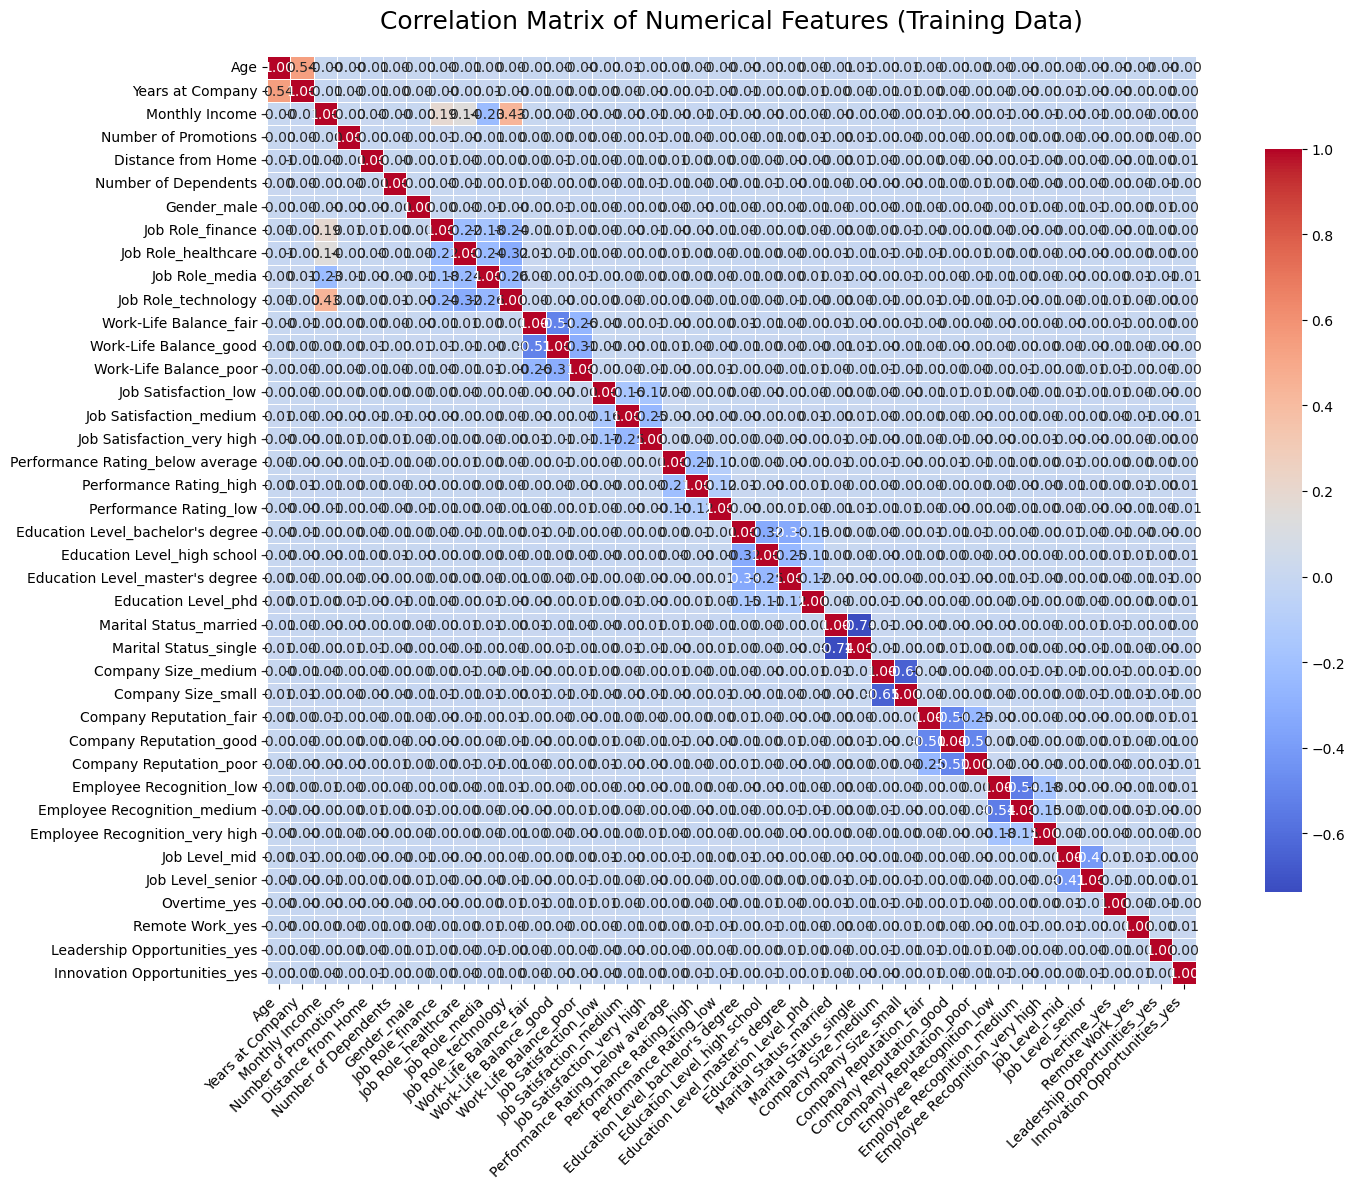

In [282]:
corr_matrix = X_train.select_dtypes(include='number').corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Numerical Features (Training Data)', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [284]:
print(y_train.head())
print(y_train.columns)

       Attrition_stayed
60704                 0
16163                 0
25709                 1
4354                  0
49862                 0
Index(['Attrition_stayed'], dtype='object')


In [285]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train["Attrition_stayed"])

In [286]:
# Display the features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 12),
 ('Years at Company', False, 9),
 ('Monthly Income', False, 23),
 ('Number of Promotions', False, 5),
 ('Distance from Home', False, 4),
 ('Number of Dependents', False, 6),
 ('Gender_male', True, 1),
 ('Job Role_finance', False, 13),
 ('Job Role_healthcare', False, 16),
 ('Job Role_media', False, 14),
 ('Job Role_technology', False, 15),
 ('Work-Life Balance_fair', True, 1),
 ('Work-Life Balance_good', False, 2),
 ('Work-Life Balance_poor', True, 1),
 ('Job Satisfaction_low', True, 1),
 ('Job Satisfaction_medium', False, 18),
 ('Job Satisfaction_very high', True, 1),
 ('Performance Rating_below average', True, 1),
 ('Performance Rating_high', False, 26),
 ('Performance Rating_low', True, 1),
 ("Education Level_bachelor's degree", False, 22),
 ('Education Level_high school', False, 25),
 ("Education Level_master's degree", False, 20),
 ('Education Level_phd', True, 1),
 ('Marital Status_married', False, 3),
 ('Marital Status_single', True, 1),
 ('Company Size_mediu

In [287]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False])

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [289]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Gender_male', 'Work-Life Balance_fair', 'Work-Life Balance_poor',
       'Job Satisfaction_low', 'Job Satisfaction_very high',
       'Performance Rating_below average', 'Performance Rating_low',
       'Education Level_phd', 'Marital Status_single',
       'Company Reputation_fair', 'Company Reputation_poor', 'Job Level_mid',
       'Job Level_senior', 'Overtime_yes', 'Remote Work_yes'],
      dtype='object')

In [290]:
X_train.columns[~rfe.support_]

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Role_finance',
       'Job Role_healthcare', 'Job Role_media', 'Job Role_technology',
       'Work-Life Balance_good', 'Job Satisfaction_medium',
       'Performance Rating_high', 'Education Level_bachelor's degree',
       'Education Level_high school', 'Education Level_master's degree',
       'Marital Status_married', 'Company Size_medium', 'Company Size_small',
       'Company Reputation_good', 'Employee Recognition_low',
       'Employee Recognition_medium', 'Employee Recognition_very high',
       'Leadership Opportunities_yes', 'Innovation Opportunities_yes'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [293]:
# Select only the columns selected by RFE
X_train[col].columns

Index(['Gender_male', 'Work-Life Balance_fair', 'Work-Life Balance_poor',
       'Job Satisfaction_low', 'Job Satisfaction_very high',
       'Performance Rating_below average', 'Performance Rating_low',
       'Education Level_phd', 'Marital Status_single',
       'Company Reputation_fair', 'Company Reputation_poor', 'Job Level_mid',
       'Job Level_senior', 'Overtime_yes', 'Remote Work_yes'],
      dtype='object')

In [294]:
# View the training data
X_train[col].head()

Gender_male  Work-Life Balance_fair  Work-Life Balance_poor  \
60704            0                       1                       0   
16163            1                       0                       1   
25709            0                       0                       0   
4354             0                       0                       0   
49862            1                       1                       0   

       Job Satisfaction_low  Job Satisfaction_very high  \
60704                     0                           0   
16163                     0                           0   
25709                     0                           0   
4354                      0                           1   
49862                     0                           0   

       Performance Rating_below average  Performance Rating_low  \
60704                                 1                       0   
16163                                 0                       0   
25709                                 0                       0   
4354                                  0                       0   
49862                                 0                       0   

       Education Level_phd  Marital Status_single  Company Reputation_fair  \
60704                    0                      1                        1   
16163                    0                      1                        0   
25709                    0                      0                        0   
4354                     0                      0                        0   
49862                    0                      0                        0   

       Company Reputation_poor  Job Level_mid  Job Level_senior  Overtime_yes  \
60704                        0              0                 0             0   
16163                        1              1                 0             1   
25709                        0              1                 0             1   
4354                         0              0                 0             0   
49862                        0              0                 0             1   

       Remote Work_yes  
60704                0  
16163                0  
25709                0  
4354                 0  
49862                0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [296]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])

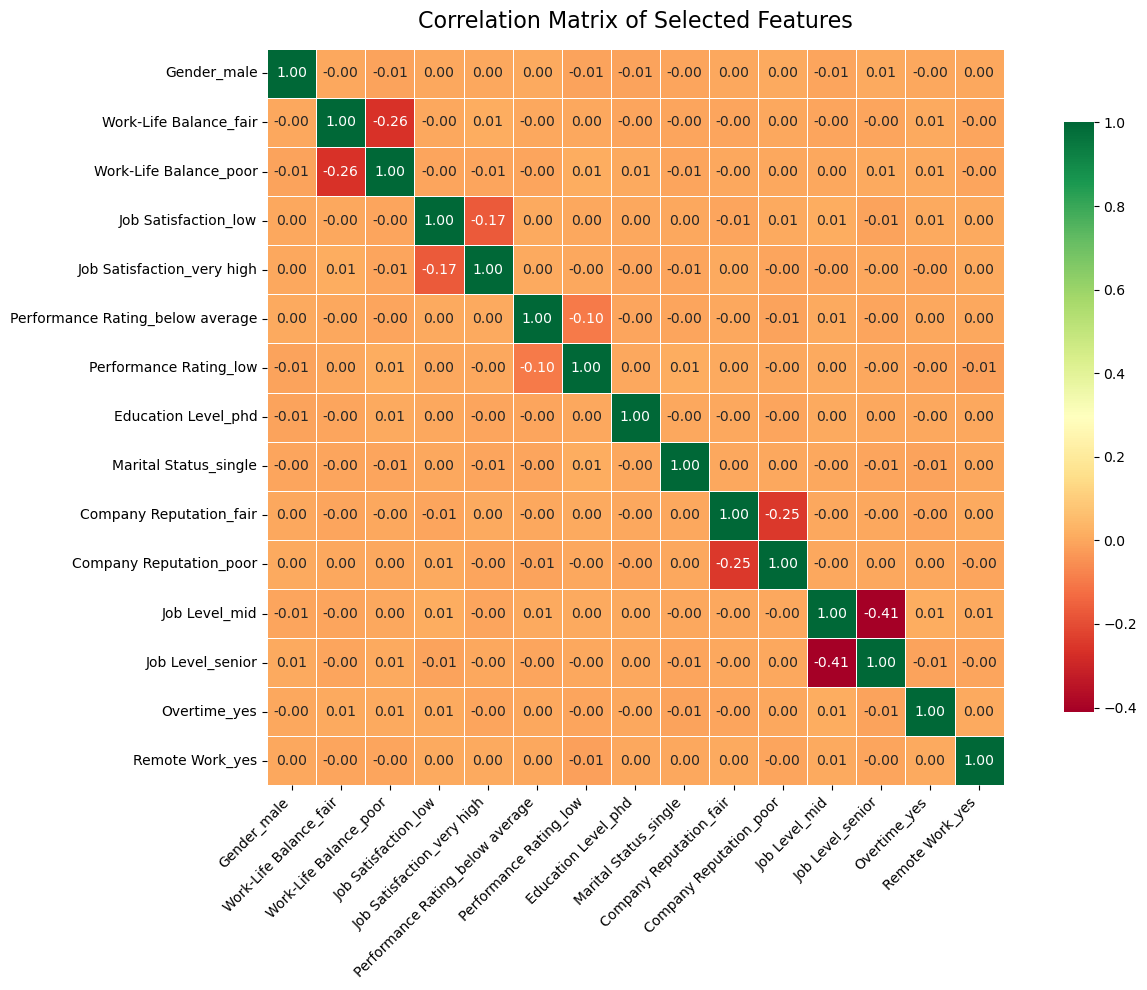

In [297]:
plt.figure(figsize=(14, 10))
sns.heatmap(X_train[col].corr(), 
            cmap='RdYlGn',        
            annot=True,            
            fmt='.2f',             
            linewidths=0.5,        
            square=True,           
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Selected Features', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [299]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Attrition_stayed   No. Observations:                52227
Model:                            GLM   Df Residuals:                    52211
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26405.
Date:                Sun, 20 Apr 2025   Deviance:                       52810.
Time:                        12:12:39   Pearson chi2:                 4.89e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3109
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2366      0.028      8.571      0.000       0.183       0.291
Gender_male                          0.5909      0.022     27.327      0.000       0.549       0.633
Work-Life Balance_fair              -1.0674      0.025    -43.545      0.000      -1.115      -1.019
Work-Life Balance_poor              -1.2243      0.033    -37.397      0.000      -1.288      -1.160
Job Satisfaction_low                -0.4542      0.036    -12.525      0.000      -0.525      -0.383
Job Satisfaction_very high          -0.4738      0.027    -17.622      0.000      -0.526      -0.421
Performance Rating_below average    -0.3205      0.030    -10.658      0.000      -0.379      -0.262
Performance Rating_low              -0.5769      0.049    -11.701      0.000      -0.674      -0.480
Education Level_phd                  1.5191      0.054     27.914      0.000       1.412       1.626
Marital Status_single               -1.7098      0.024    -71.208      0.000      -1.757      -1.663
Company Reputation_fair             -0.4897      0.028    -17.618      0.000      -0.544      -0.435
Company Reputation_poor             -0.7232      0.028    -26.133      0.000      -0.777      -0.669
Job Level_mid                        0.9562      0.024     40.582      0.000       0.910       1.002
Job Level_senior                     2.5084      0.034     74.339      0.000       2.442       2.575
Overtime_yes                        -0.3641      0.023    -15.964      0.000      -0.409      -0.319
Remote Work_yes                      1.7126      0.030     56.448      0.000       1.653       1.772
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [302]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [303]:
# Make a VIF DataFrame for all the variables present
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(X_train[col])

variables       VIF
0                        Gender_male  1.842189
1             Work-Life Balance_fair  1.405620
2             Work-Life Balance_poor  1.185846
3               Job Satisfaction_low  1.117519
4         Job Satisfaction_very high  1.235202
5   Performance Rating_below average  1.153701
6             Performance Rating_low  1.053870
7                Education Level_phd  1.045440
8              Marital Status_single  1.414224
9            Company Reputation_fair  1.250725
10           Company Reputation_poor  1.260166
11                     Job Level_mid  1.653168
12                  Job Level_senior  1.327422
13                      Overtime_yes  1.386496
14                   Remote Work_yes  1.197454

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [306]:
# Predict the probabilities on the training set
y_train_pred = res.predict(X_train_sm)
y_train_pred

60704    0.033872
16163    0.096416
25709    0.696075
4354     0.440997
49862    0.353436
           ...   
14260    0.695834
63370    0.742784
65615    0.440326
56088    0.919211
38408    0.981679
Length: 52227, dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [308]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.03387203, 0.0964156 , 0.69607536, ..., 0.44032619, 0.91921077,
       0.9816786 ])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [310]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Attrition Actual':y_train.values.reshape(-1), 'Attrition Prob':y_train_pred})
y_train_pred_final

Attrition Actual  Attrition Prob
0                     0        0.033872
1                     0        0.096416
2                     1        0.696075
3                     0        0.440997
4                     0        0.353436
...                 ...             ...
52222                 1        0.695834
52223                 1        0.742784
52224                 1        0.440326
52225                 1        0.919211
52226                 1        0.981679

[52227 rows x 2 columns]

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [312]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.5 else 0, axis=1)
y_train_pred_final

Attrition Actual  Attrition Prob  Predicted
0                     0        0.033872          0
1                     0        0.096416          0
2                     1        0.696075          1
3                     0        0.440997          0
4                     0        0.353436          0
...                 ...             ...        ...
52222                 1        0.695834          1
52223                 1        0.742784          1
52224                 1        0.440326          0
52225                 1        0.919211          1
52226                 1        0.981679          1

[52227 rows x 3 columns]

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [315]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"]))

0.7387366687728569


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [317]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"])
confusion

array([[17717,  7015],
       [ 6630, 20865]], dtype=int64)

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [319]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(TP, TN, FP, FN)

20865 17717 7015 6630


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [321]:
# Calculate sensitivity
sen = TP / float (TP+FN)
sen

0.7588652482269503

In [322]:
# Calculate specificity
spec = TN / float (TN+FP)
spec

0.7163593724729096

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [324]:
# Calculate precision
pre = TP / float(TP+FP)
pre

0.7483859397417504

In [325]:
# Calculate recall
rec = TP / float (TP+FN)
rec

0.7588652482269503

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [328]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import metrics

def draw_roc(actual, probs, title='ROC Curve', show_auc=True):
    # Compute the ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    # Create the ROC curve plot
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'AUC = {auc_score:.4f}' if show_auc else None)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    
    # Set plot limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Display AUC score if required
    if show_auc:
        plt.legend(loc='lower right', fontsize=10)
    
    # Ensure the plot is nicely formatted and show it
    plt.tight_layout()
    plt.show(block=True)  # This will block and display the plot until it's closed

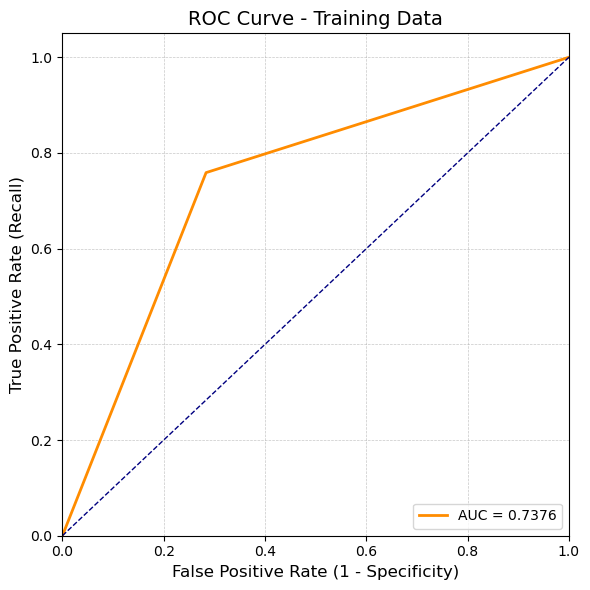

In [329]:
# Call the ROC function
draw_roc(
    y_train_pred_final["Attrition Actual"], 
    y_train_pred_final["Predicted"], 
    title='ROC Curve - Training Data'
)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [332]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Attrition Prob"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Attrition Actual  Attrition Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                 0        0.033872          0    1    0    0    0    0    0   
1                 0        0.096416          0    1    0    0    0    0    0   
2                 1        0.696075          1    1    1    1    1    1    1   
3                 0        0.440997          0    1    1    1    1    1    0   
4                 0        0.353436          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    0    0    0  
3    0    0    0    0  
4    0    0    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [334]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
# Create an empty DataFrame to store results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# Define thresholds
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate over each threshold
for threshold in thresholds:
    # Apply the threshold to predicted probabilities to get predicted classes
    y_pred = (y_train_pred_final["Predicted"] >= threshold).astype(int)
    
    # Generate the confusion matrix
    cm = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_pred)
    
    # Calculate accuracy, sensitivity, and specificity
    total = cm.sum()
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    # Append the results to the DataFrame
    cutoff_df.loc[len(cutoff_df)] = [threshold, accuracy, sensitivity, specificity]

# Display the DataFrame with cutoff values and corresponding metrics
print(cutoff_df)

   prob  accuracy     sensi     speci
0   0.0  0.526452  1.000000  0.000000
1   0.1  0.738737  0.758865  0.716359
2   0.2  0.738737  0.758865  0.716359
3   0.3  0.738737  0.758865  0.716359
4   0.4  0.738737  0.758865  0.716359
5   0.5  0.738737  0.758865  0.716359
6   0.6  0.738737  0.758865  0.716359
7   0.7  0.738737  0.758865  0.716359
8   0.8  0.738737  0.758865  0.716359
9   0.9  0.738737  0.758865  0.716359


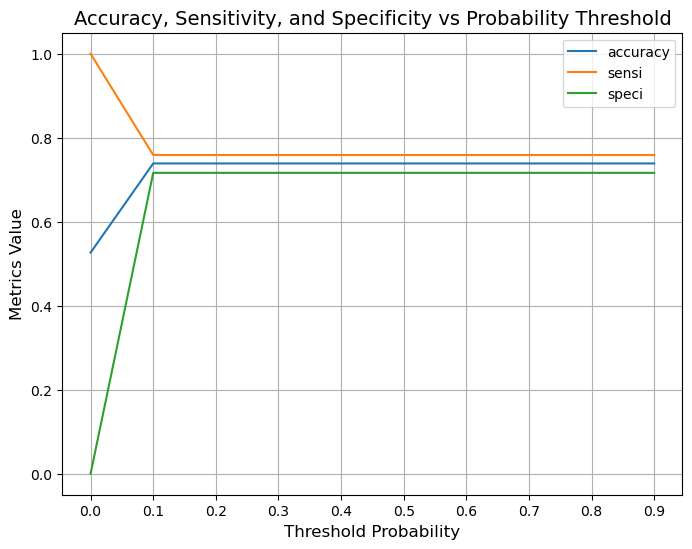

In [335]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], figsize=(8, 6))
plt.xticks(np.arange(0.0, 1, 0.1))
plt.xlabel('Threshold Probability', fontsize=12)
plt.ylabel('Metrics Value', fontsize=12)
plt.title('Accuracy, Sensitivity, and Specificity vs Probability Threshold', fontsize=14)
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [337]:
# Create a column for final prediction based on the optimal cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.52 else 0, axis=1)
y_train_pred_final

Attrition Actual  Attrition Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0                     0        0.033872          0    1    0    0    0    0   
1                     0        0.096416          0    1    0    0    0    0   
2                     1        0.696075          1    1    1    1    1    1   
3                     0        0.440997          0    1    1    1    1    1   
4                     0        0.353436          0    1    1    1    1    0   
...                 ...             ...        ...  ...  ...  ...  ...  ...   
52222                 1        0.695834          1    1    1    1    1    1   
52223                 1        0.742784          1    1    1    1    1    1   
52224                 1        0.440326          0    1    1    1    1    1   
52225                 1        0.919211          1    1    1    1    1    1   
52226                 1        0.981679          1    1    1    1    1    1   

       0.5  0.6  0.7  0.8  0.9  final_Predicted  
0        0    0    0    0    0                0  
1        0    0    0    0    0                0  
2        1    1    0    0    0                1  
3        0    0    0    0    0                0  
4        0    0    0    0    0                0  
...    ...  ...  ...  ...  ...              ...  
52222    1    1    0    0    0                1  
52223    1    1    1    0    0                1  
52224    0    0    0    0    0                0  
52225    1    1    1    1    1                1  
52226    1    1    1    1    1                1  

[52227 rows x 14 columns]

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [339]:
# Calculate the accuracy
print(metrics.accuracy_score(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"]))

0.7385834912976047


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [341]:
# Create the confusion matrix once again
confusion_f = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"])
confusion_f

array([[18217,  6515],
       [ 7138, 20357]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [343]:
# Create variables for true positive, true negative, false positive and false negative
TP_f = confusion_f[1,1] # true positive
TN_f = confusion_f[0,0] # true negatives
FP_f = confusion_f[0,1] # false positives
FN_f = confusion_f[1,0] # false negatives

print(TP_f, TN_f, FP_f, FN_f)

20357 18217 6515 7138


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [345]:
# Calculate Sensitivity
sensi_f = TP_f / float (TP_f+FN_f)
sensi_f

0.7403891616657574

In [346]:
# Calculate Specificity
spec_f = TN_f / float(TN_f+FP_f)
spec_f

0.7365760957464014

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [348]:
# Calculate Precision
pre_f = TP_f / float(TP_f+FP_f)
pre_f

0.7575543316463234

In [349]:
# Calculate Recall
rec_f = TP_f / float (TP_f+FN_f)
rec_f

0.7403891616657574

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [351]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [352]:
# Check actual and predicted values from initial model
y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"]

(0        0
 1        0
 2        1
 3        0
 4        0
         ..
 52222    1
 52223    1
 52224    1
 52225    1
 52226    1
 Name: Attrition Actual, Length: 52227, dtype: int32,
 0        0
 1        0
 2        1
 3        0
 4        0
         ..
 52222    1
 52223    1
 52224    0
 52225    1
 52226    1
 Name: final_Predicted, Length: 52227, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

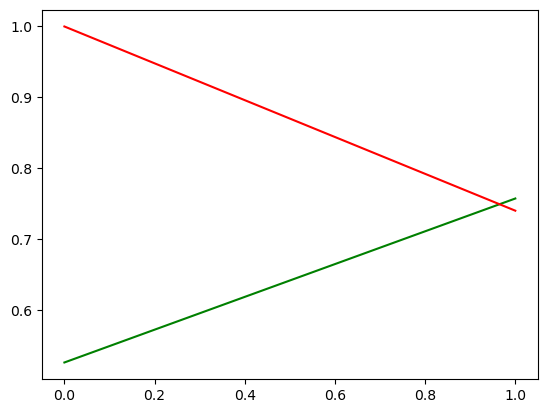

In [354]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [358]:
# Select the relevant features for validation set
X_test = X_test[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [360]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test[col])

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [362]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_test_sm)
# View predictions
y_validation_pred

61539    0.989411
42583    0.696075
55936    0.208089
66035    0.413788
23119    0.064596
           ...   
60911    0.671797
38306    0.983594
57813    0.103286
4886     0.414162
41608    0.737936
Length: 22383, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [364]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

y_test_final = pd.concat([actual, predicted_probability], axis=1)
y_test_final.head()

Attrition_stayed         0
0                 1  0.989411
1                 1  0.696075
2                 0  0.208089
3                 0  0.413788
4                 0  0.064596

In [365]:
# renaming the column
y_test_final = y_test_final.rename(columns = {0: 'Attrition Prob'})
y_test_final.head()

Attrition_stayed  Attrition Prob
0                 1        0.989411
1                 1        0.696075
2                 0        0.208089
3                 0        0.413788
4                 0        0.064596

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [367]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_test_final["final_Predicted"] = y_test_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.52 else 0, axis=1)
# Check the DataFrame
y_test_final.head()

Attrition_stayed  Attrition Prob  final_Predicted
0                 1        0.989411                1
1                 1        0.696075                1
2                 0        0.208089                0
3                 0        0.413788                0
4                 0        0.064596                0

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [369]:
# Calculate the overall accuracy
print(metrics.accuracy_score(y_test_final["Attrition_stayed"], y_test_final["final_Predicted"]))

0.7371665996515212


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [371]:
# Create confusion matrix
confusion_t = metrics.confusion_matrix(y_test_final["Attrition_stayed"], y_test_final["final_Predicted"])
confusion_t

array([[7894, 2793],
       [3090, 8606]], dtype=int64)

In [372]:
# Create variables for true positive, true negative, false positive and false negative
TP_t = confusion_t[1,1] # true positive
TN_t = confusion_t[0,0] # true negatives
FP_t = confusion_t[0,1] # false positives
FN_t = confusion_t[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [374]:
# Calculate sensitivity
sensi_t = TP_t / float(TP_t+FN_t)
sensi_t

0.7358071135430917

In [375]:
# Calculate specificity
spec_t = TN_t / float(TN_t+FP_t)
spec_t

0.7386544399738

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [377]:
# Calculate precision
precision_score(y_test_final["Attrition_stayed"], y_test_final["final_Predicted"])

0.754978506886569

In [378]:
# Calculate recall
recall_score(y_test_final["Attrition_stayed"], y_test_final["final_Predicted"])

0.7358071135430917

## Conclusion



## Model Performance metrics as below

Accuracy of the model is 73.87%

## Training data
Sensitivity on Training data is 74.03%

Specificity on Training data is 73.6%

## Test data
Sensitivity on Test data is 73.58%

Specificity on Test data is 73.86%